# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 1. Cвойства и сравнение оценок
### Мягкий дедлайн --- 6 октября 23:59
### Жёсткий дедлайн --- 12 октября 16:59

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о способе сдачи домашнего задания будет позже.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [3]:
# Matplotlib needed to correctly display suptitles,
# as well as some other minor things.
# I thought I might as well ensure everything is up to date
%pip install --upgrade matplotlib numpy scipy statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 801.4 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

plt.rcParams['text.usetex'] = True
sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [6]:
np.random.seed(42)

**Условие задания**: Аспект-Император трёх морей Анасуримбор Келлхус спустя 20 лет с момента объединения Новой Империи объявляет начало Великой Ордалии --- похода против крепости Голготтерат. Поход займёт более, чем пол года путешествия сквозь безжизненные населённые дикими монстрами пустоши, в связи с чем Келлхус отдаёт приказ всем провинциям выдать провизию для похода, а имперским математикам, коим принадлежите Вы --- сосчитать, каждый ли правитель провинции выполнил приказ качественно.

В этой практике Вам придётся оценить число материальных ресурсов, предоставленных каждой из тысячи провинций, лучшим образом и предоставить отчёт, чему равно мат. ожидание числа ресурсов и почему Ваш способ оценивания хорош. Будем надеяться, что в среднем все короли добросовестно выполнили приказ.

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

### Задача 1

Известно, что количество урожая каждой Нансурской провинции в год подчиняется распределению $U[0, 2]$ в тоннах. Некоторые короли решают оставить существенную часть урожая, мимикрируя под $U[0, \theta]$ для $\theta < 2$. Нужно предложить метод оценки $\theta$. Если значение оценки будет меньше 2, приказ будет считаться невыполненным.

Ставится задача изучить способы оценивания параметра $\theta$ семейства распределений $U[0, \theta]$. В данной задаче Вы численно смоделируете оценки параметра $\theta$ и сделаете вывод о том, какую оценку стоит применить на практике.

Сгенерируйте $N$ выборок $X_1, \dots, X_N$ размера $N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$ и $\theta = 2$.

In [8]:
N = 1e4  # use this
N = int(N)
theta = 1.8

X = sps.uniform.rvs(scale=theta, size=(N, N))

Для всех $N$ выборок посчитайте оценки параметра $\theta$: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

In [11]:
est = np.zeros((5, N, N)) # list of prefix estimators | est[i, j, k], i-estimator number, j-prefix number, k-estimation sample number

est[0] = (2*np.cumsum(X, axis=1)[:, ]/np.arange(1, N + 1)).T
est[1] = (np.cumsum(X, axis=1)[:, ]/np.arange(1, N + 1) + np.maximum.accumulate(X, axis=1)/2).T
est[2] = (np.minimum.accumulate(X, axis=1)[:, ]*np.arange(2, N + 2)).T
est[3] = (np.maximum.accumulate(X, axis=1) + np.minimum.accumulate(X, axis=1)).T
est[4] = (np.maximum.accumulate(X, axis=1)*np.arange(2, N + 2)/np.arange(1, N + 1)).T

При помощи моделирования выясните, какие оценки точнее, чем другие.

Для этого прикиньте распределение каждой из оценок. Какая оценка предпочтительнее? Почему?

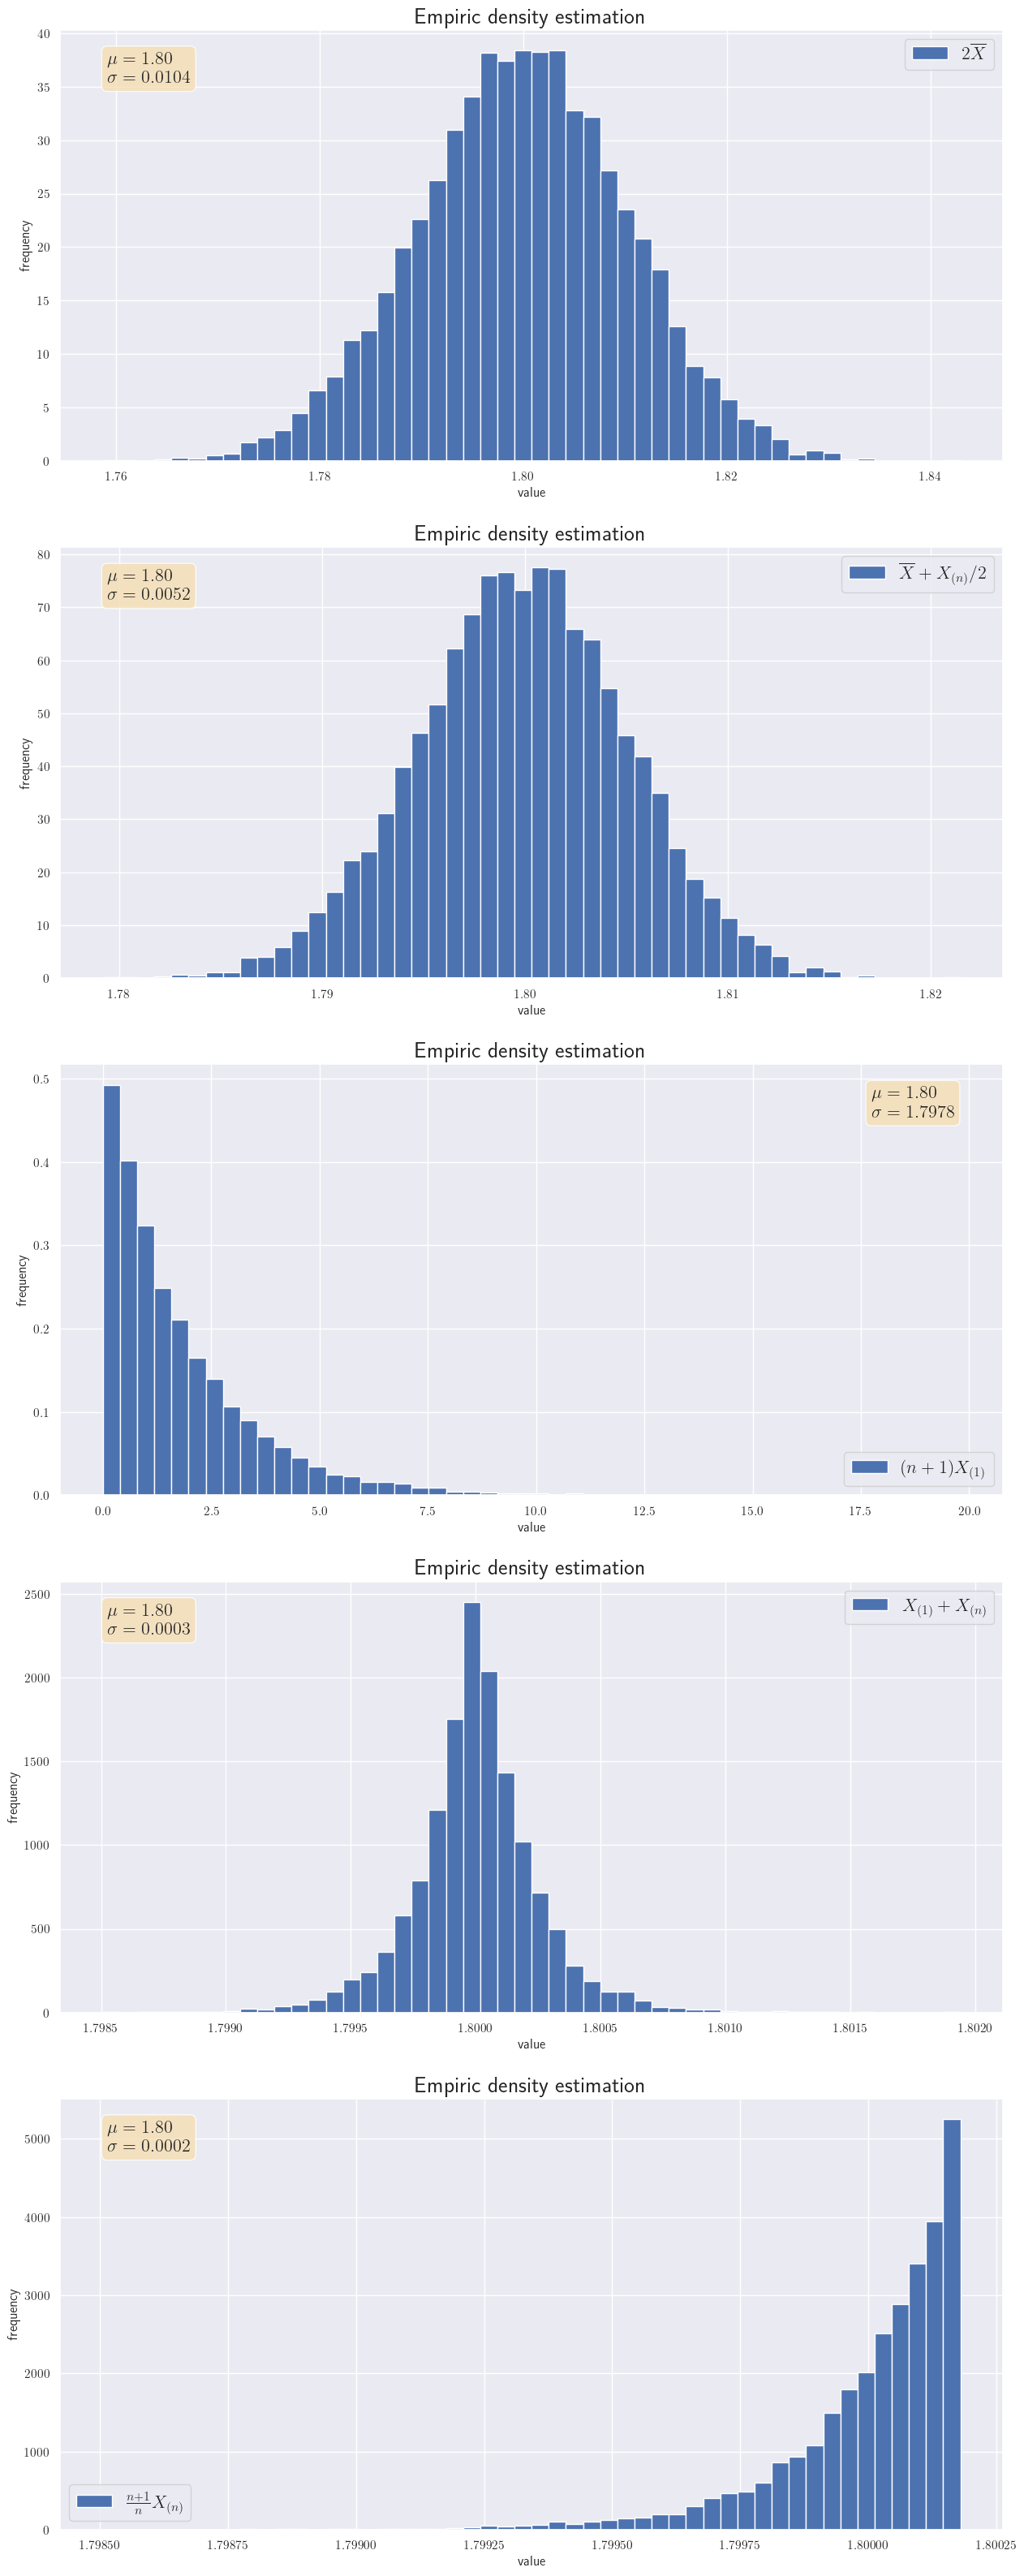

In [14]:
fig, axs = plt.subplots(5, figsize=(15, 40))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
align = np.array([[0.05, 0.05, 0.86, 0.05, 0.05], 
                 [0.95, 0.95, 0.95, 0.95, 0.95]])
est_lab = np.array([r'$2\overline{X}$', r'$\overline{X} + X_{(n)}/2$', r'$(n + 1)X_{(1)}$',
                   r'$X_{(1)} + X_{(n)}$', r'$\frac{n + 1}{n}X_{(n)}$'])

for idx, ax in np.ndenumerate(axs):
    ax.hist(est[idx][N - 1], density=True, bins=50, label=est_lab[idx])
    ax.legend(fontsize=16)
    ax.set_xlabel('value')
    ax.set_ylabel('frequency')
    ax.set_title('Empiric density estimation', fontsize=20)
    textstr = '\n'.join((
    r'$\mu=%.2f$' % (est[idx][N - 1].mean(), ),
    r'$\sigma=%.4f$' % (est[idx][N - 1].std(), )))
    ax.text(align[0][idx], align[1][idx], textstr, transform=ax.transAxes,
            fontsize=16, verticalalignment='top', bbox=props)
plt.show()

Как видим, наиболее предпочтительной являются оценки $X_{(1)} + X_{(n)}$ и $\frac{n + 1}{n}X_{(n)}$, которые приближают исходный параметр $\theta = 1.8$ с наилучшей точностью (наименьшим разбросом $\sigma$).

Как меняется распределение каждой оценки с ростом параметра? Постройте оценки не только по выборкам, но и по их префиксам. В качестве размера префикса возьмите хотя бы 4 значения, меньших N.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

Изучите оценки на состоятельность и нормальность. Сравните скорости сходимости.

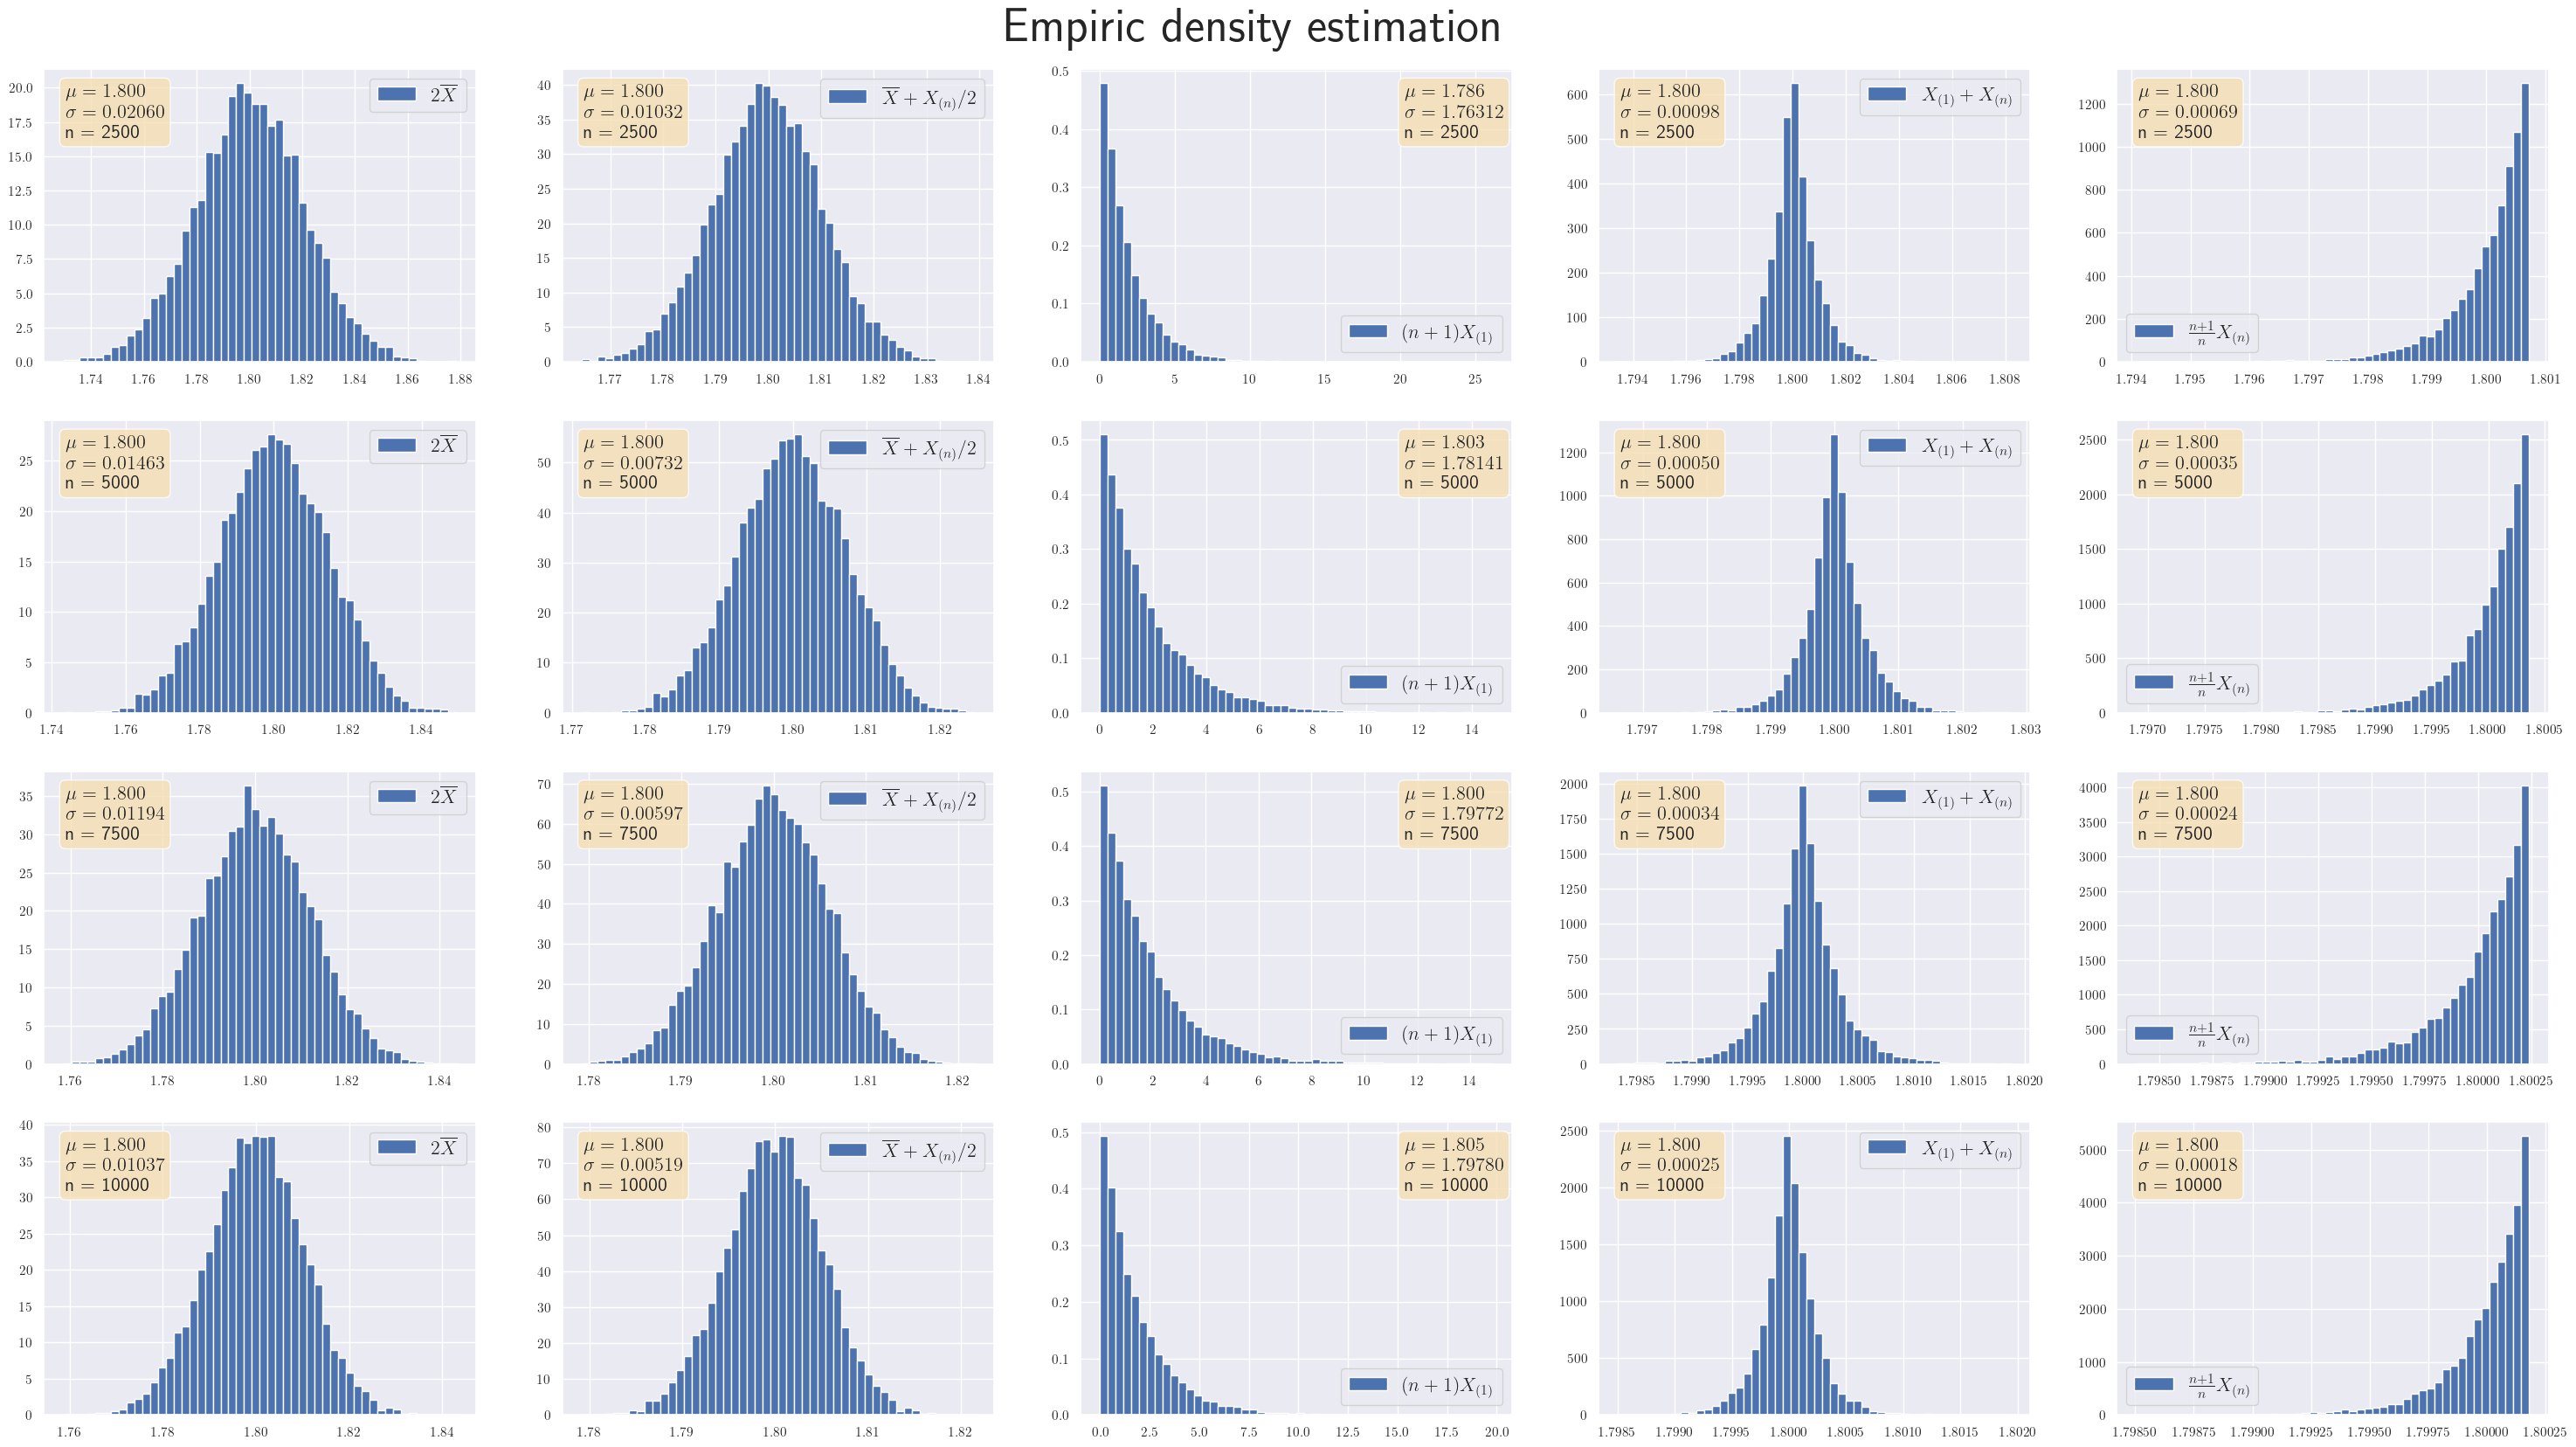

In [18]:
N_arr = np.arange(2500, 10001, 2500)

fig, axs = plt.subplots(N_arr.size, 5, figsize=(37, 20))
fig.suptitle('Empiric density estimation', y=0.915, fontsize=40)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
align = np.array([[0.05, 0.05, 0.75, 0.05, 0.05], 
                 [0.95, 0.95, 0.95, 0.95, 0.95]])
est_lab = np.array([r'$2\overline{X}$', r'$\overline{X} + X_{(n)}/2$', r'$(n + 1)X_{(1)}$',
                   r'$X_{(1)} + X_{(n)}$', r'$\frac{n + 1}{n}X_{(n)}$'])

for idx in np.arange(N_arr.size):
    for jdx, ax in np.ndenumerate(axs[idx, :]):
        ax.hist(est[jdx][N_arr[idx] - 1], density=True, bins=50, label=est_lab[jdx])
        ax.legend(fontsize=16)
        textstr = '\n'.join((
        r'$\mu=%.3f$' % (est[jdx][N_arr[idx] - 1].mean(), ),
        r'$\sigma=%.5f$' % (est[jdx][N_arr[idx] - 1].std(), ),
        r'n = %.d' % (N_arr[idx], )))
        ax.text(align[0][jdx], align[1][jdx], textstr, transform=ax.transAxes,
                fontsize=16, verticalalignment='top', bbox=props)

plt.show()

Перенесём каждый из блоков графиков на один.

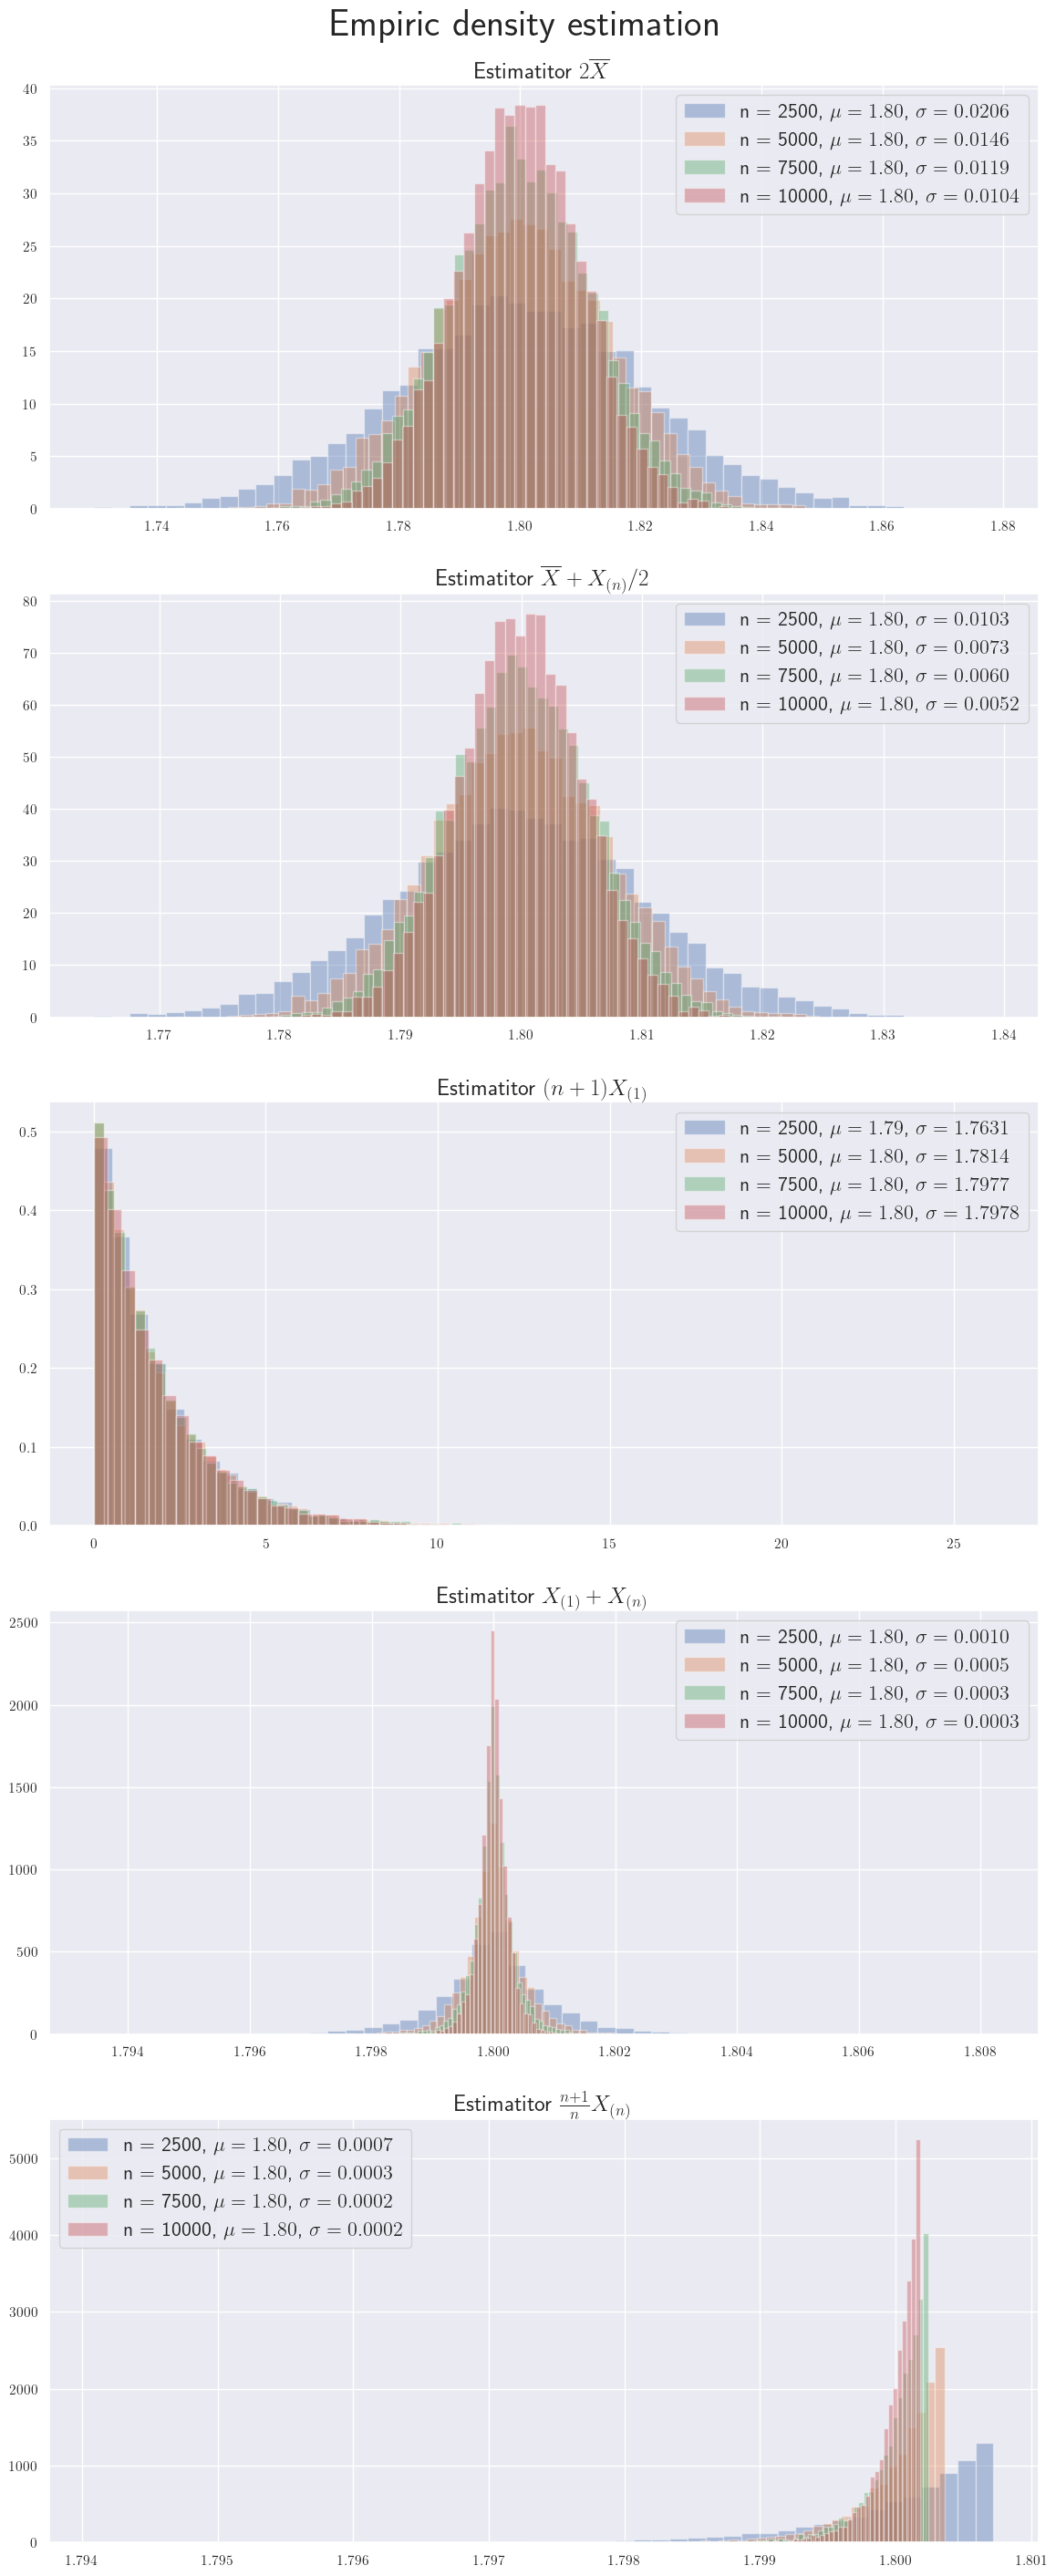

In [20]:
N_arr = np.arange(2500, 10001, 2500)

fig, axs = plt.subplots(5, figsize=(14, 35))
fig.suptitle('Empiric density estimation', y=0.904, fontsize=30)
est_lab = np.array([r'$2\overline{X}$', r'$\overline{X} + X_{(n)}/2$', r'$(n + 1)X_{(1)}$',
                   r'$X_{(1)} + X_{(n)}$', r'$\frac{n + 1}{n}X_{(n)}$'])

for jdx, ax in np.ndenumerate(axs):
    ax.set_title(' '.join(('Estimatitor', est_lab[jdx])), fontsize=18)
    for idx in np.arange(N_arr.size):
        textstr = ', '.join((
        r'n = %.d' % (N_arr[idx], ),
        r'$\mu=%.2f$' % (est[jdx][N_arr[idx] - 1].mean(), ),
        r'$\sigma=%.4f$' % (est[jdx][N_arr[idx] - 1].std(), )))
        ax.hist(est[jdx][N_arr[idx] - 1], density=True, bins=50, label=textstr, alpha=0.4)
    ax.legend(fontsize=16)

plt.show()

Как видим, для всех (кроме $(n + 1)X_{(1)}$) оценок: 
1) Точное значение исходного параметра распределения $\theta$ прекрасно аппроксимируется значением оценки
2) при росте размера выборки увеличивается точность определения параметра распределения $\theta$ (уменьшается стандартное отклонение оценки $\sigma$ от среднего значения оценки $\mu$).

Изучим оценки на состоятельность и ассимптотическую нормальность.

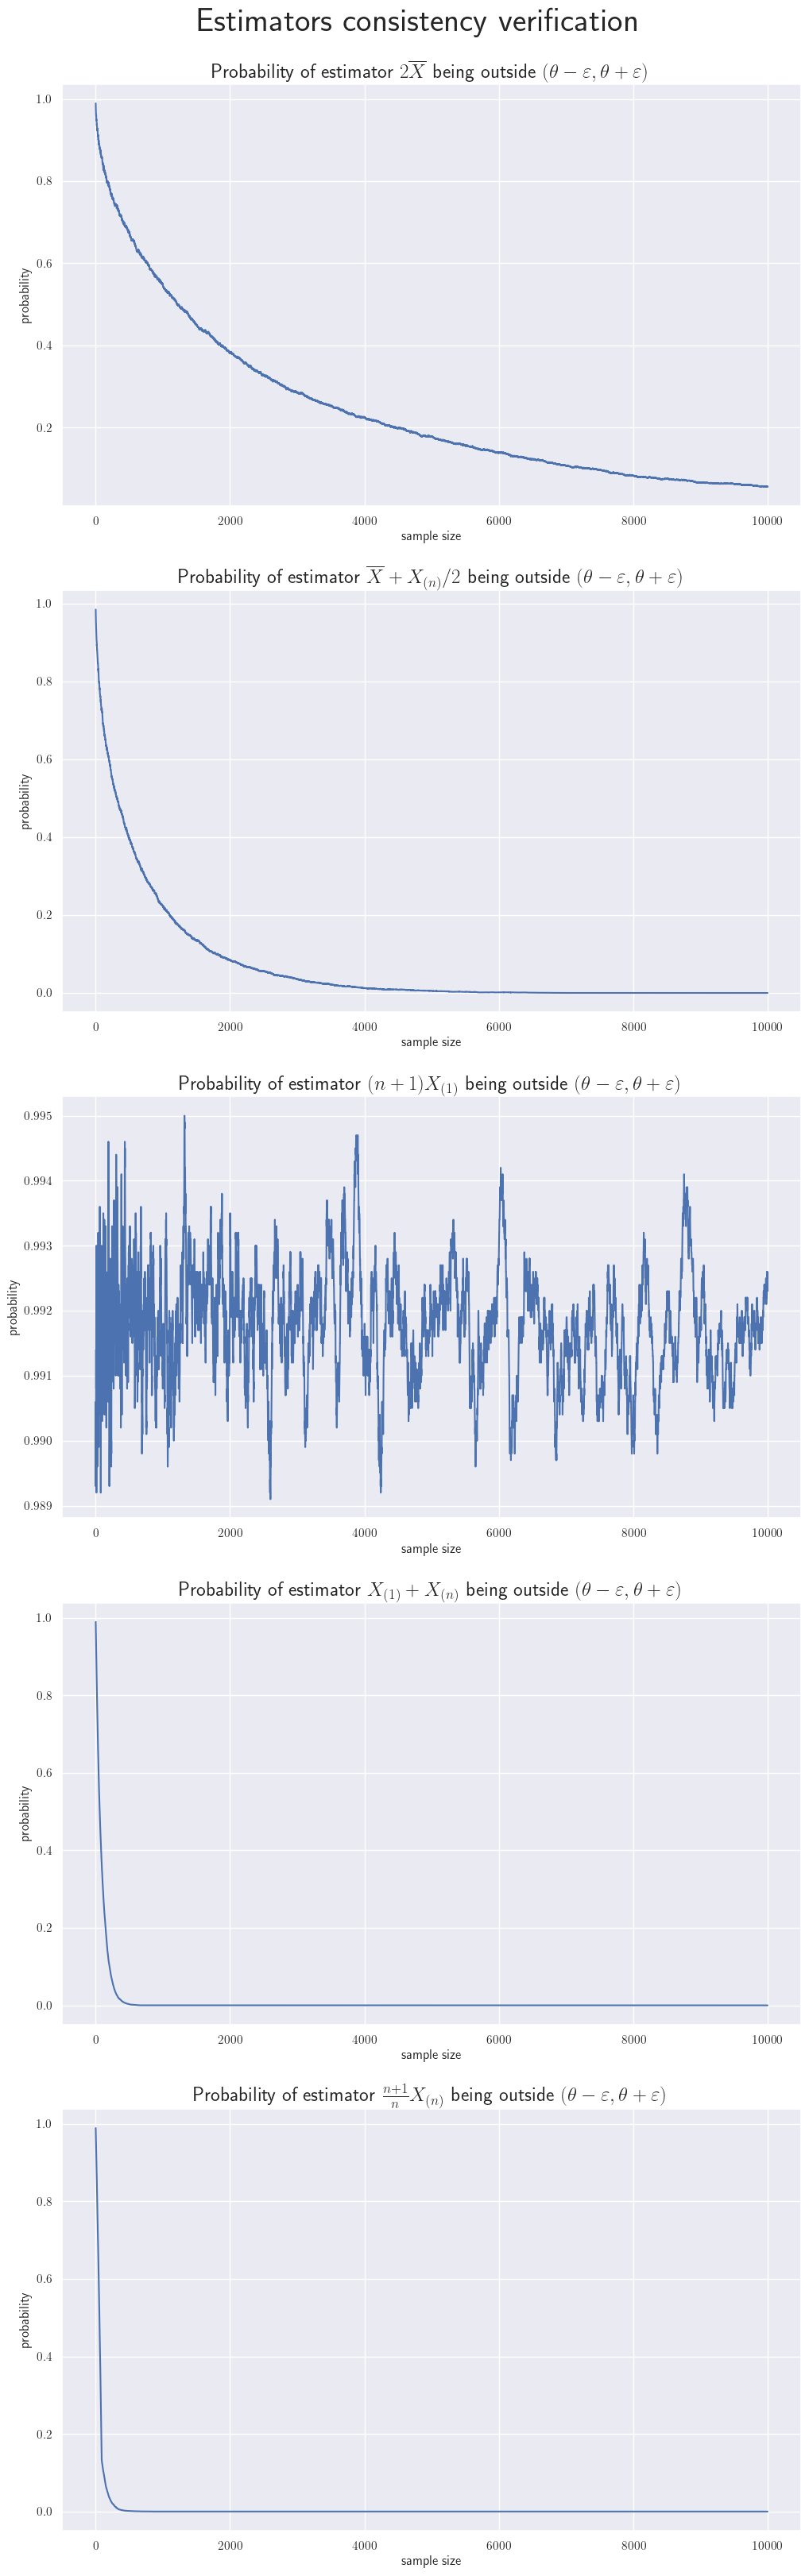

In [24]:
eps = 0.02
est_lab = np.array([r'$2\overline{X}$', r'$\overline{X} + X_{(n)}/2$', r'$(n + 1)X_{(1)}$',
                   r'$X_{(1)} + X_{(n)}$', r'$\frac{n + 1}{n}X_{(n)}$'])

fig, axs = plt.subplots(5, figsize=(12, 40))
fig.suptitle('Estimators consistency verification', y=0.904, fontsize=30)

for idx, ax in np.ndenumerate(axs):
    prob = (abs(est[idx] - theta) > eps).sum(axis=1)/N
    ax.set_xlabel('sample size')
    ax.set_ylabel('probability')
    ax.set_title(' '.join(('Probability of estimator', est_lab[idx],
                           r'being outside $(\theta - \varepsilon, \theta + \varepsilon)$')), fontsize=18)
    ax.plot(np.arange(1, N + 1), prob)
plt.show()

**Состоятельность**: Как видим все оценки, кроме $(n + 1)X_{(1)}$ оказались состоятельными. По скорости сходимости (так как все графики выше монотонно убывают, для сравнения их скоростей убывания достаточно сравнить их значения при фиксированном размере выборки и расположить их по принципу: у кого меньше полученная вероятность - у того и выше скорость сходимости) оценки соотносятся друг с другом как $$2\overline{X} \prec \overline{X} + X_{(n)}/2 \prec X_{(1)} + X_{(n)} \prec \frac{n + 1}{n}X_{(n)}$$ т.е. оценка $\frac{n + 1}{n}X_{(n)}$ обладает самой высокой скоростью сходимости.

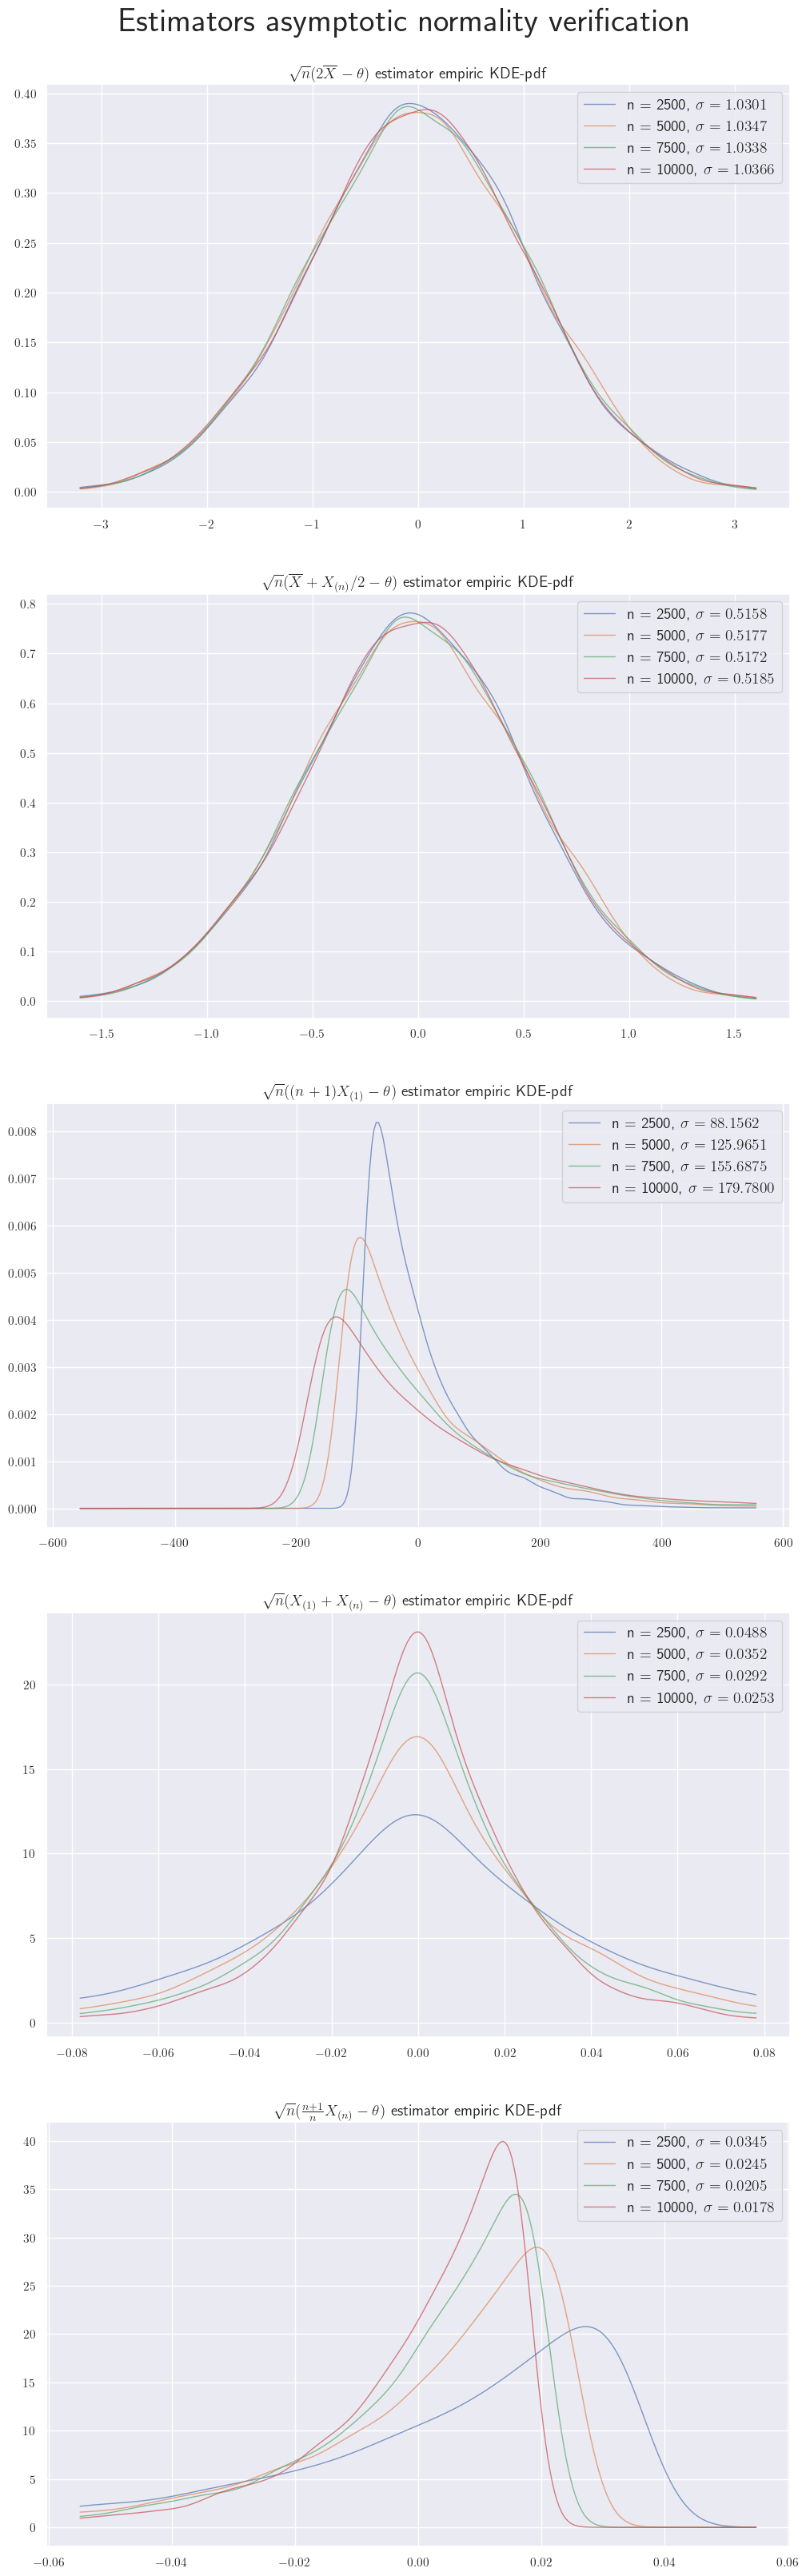

In [31]:
sigma_0 = np.array([(np.sqrt(N)*(est[i][N - 1] - theta)).std() for i in range(5)])
N_arr = np.arange(2500, 10001, 2500)
grid = np.linspace(sps.norm.ppf(0.001, scale=sigma_0), sps.norm.ppf(0.999, scale=sigma_0), 300).T


est_lab = np.array([r'$\sqrt{n}(2\overline{X}-\theta)$', r'$\sqrt{n}(\overline{X} + X_{(n)}/2 - \theta)$',
                    r'$\sqrt{n}((n + 1)X_{(1)} - \theta)$', r'$\sqrt{n}(X_{(1)} + X_{(n)} - \theta)$', 
                    r'$\sqrt{n}(\frac{n + 1}{n}X_{(n)} - \theta)$'])

fig, axs = plt.subplots(5, figsize=(12, 40))
fig.suptitle('Estimators asymptotic normality verification', y=0.904, fontsize=30)

for idx, ax in np.ndenumerate(axs):
    ax.set_title(' '.join((est_lab[idx], 'estimator empiric KDE-pdf ')), fontsize=14)
    for jdx, n in np.ndenumerate(N_arr):
        P = np.sqrt(n)*(est[idx][n - 1] - theta)
        kernel = sps.gaussian_kde(P)
        labelstr = ', '.join((
        r'n = %.d' % (N_arr[jdx], ),
        r'$\sigma=%.4f$' % ((np.sqrt(n)*(est[idx][n - 1] - theta)).std(), )))
        ax.plot(grid[idx], kernel.pdf(grid[idx]), label=labelstr, alpha=0.7, lw=1)
    ax.legend(fontsize=14)

plt.show()

Какая оценка получилась лучше? Как Вы это поняли? А что говорит теория? Стоит ли в данной ситуации сравнивать оценки для других значений параметра $\theta$?

**Асс. нормальность (асс. подход)**: из графиков выше видно, что ассимптотической нормальностью обладают только оценки $2\overline{X}$, $\overline{X} + X_{(n)}/2$ и $X_{(1)} + X_{(n)}$, причем, сравнивая их в ассимптотическом подходе (лучше тот, у кого меньше дисперсия), получаем: $$2\overline{X} \prec \overline{X} + X_{(n)}/2 \prec X_{(1)} + X_{(n)}.$$

**Среднеквадратичный подход**: сравнивая выборочные дисперсии оценок (учитывая, что во всех случаях выборочное среднее с хорошей точностью равно исходному параметру $\theta$, можем считать, что выборочная дисперсия это аккурат среднеквадратичное отклонение), получаем: $$(n + 1)X_{(1)} \prec 2\overline{X} \prec \overline{X} + X_{(n)}/2 \prec X_{(1)} + X_{(n)} \prec \frac{n + 1}{n}X_{(n)}.$$

__Ответ:__ из теории имеем следующие функции среднеквадратического отклонения $R(2\overline{X}, \theta) = \frac{\theta^2}{3n}$, $R((n + 1)X_{(1)}, \theta) = \frac{n\theta^2}{n + 2}$, $R(X_{(1)} + X_{(n)}, \theta) = \frac{2\theta^2}{(n + 1)(n + 2)}$, $R(\frac{n + 1}{n}X_{(n)}, \theta) = \frac{\theta^2}{n(n + 2)}$. Т. е в среднеквадр. подходе имеем (при достаточно больших $n$): $$(n + 1)X_{(1)} \prec 2\overline{X} \prec X_{(1)} + X_{(n)} \prec \frac{n + 1}{n}X_{(n)}.$$ Поскольку все выражения для среднеквадр. откл. оценок имеют квадратичную зависимость по $\theta$ а также какую-то асимптотическую степень аппроксимации по $n$, достаточно рассматривать эти выражения для какого-то одного $\theta$ и какого-то достаточно большого $n$.


Сделайте вывод. 

__Вывод:__ видим, что мало того, что согласуются теоретические и экспериментальные соображения по поводу эфективности оценок, так еще мы и получили согласованность между разными подходами сравнения оценок. Объединяя все результаты, мы смогли составить полную иерархию оценок, которую мы не смогли бы получить, следуя лишь одному подходу (в каких-то случаях отклонение не считается теоретически, в каких-то оценка не асимптотически нормальная и т.д.).

### Задача 2

Конрийские провинции известны своими пастбищами и скотоводами. Принц Нерсей Пройас замерил, что количество скота подчиняется экспоненциальному распределению с параметром $\lambda = 1$ (в тысячах голов). Для подсчёта оценки параметра есть семейство оценок $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$, каждая следующая из которых требует большего числа операций на вычисление. Стоит ли оно того? Это и нужно выяснить.

В этой задаче Вы научитесь подбирать гиперпараметр к семейству оценок. Как известно из основного курса статистики, для любого $k$ оценка  $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ является состоятельной и асимптотически нормальной. Но какой $k$ стоит выбрать?

Сгенерируйте $N$ выборок $X_1, ..., X_N$ размера $n$ из экспоненциального распределения с параметром $\lambda = 1$ для $N = n = 10^4$.

In [33]:
from scipy.special import factorial

In [35]:
lamb = 1.0
N = 1e4
N = int(N)
X = sps.expon.rvs(scale = lamb, size=(N, N))

Для всех выборок посчитайте оценку $\widehat{\lambda}_k=(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\lambda$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [38]:
k_arr = np.arange(1, 11)
est = np.zeros((k_arr.size, N))
for idx, k in np.ndenumerate(k_arr):
    est[idx] = pow((factorial(k))/(sps.moment(X, order=k, center=0., axis=1)), 1/k)

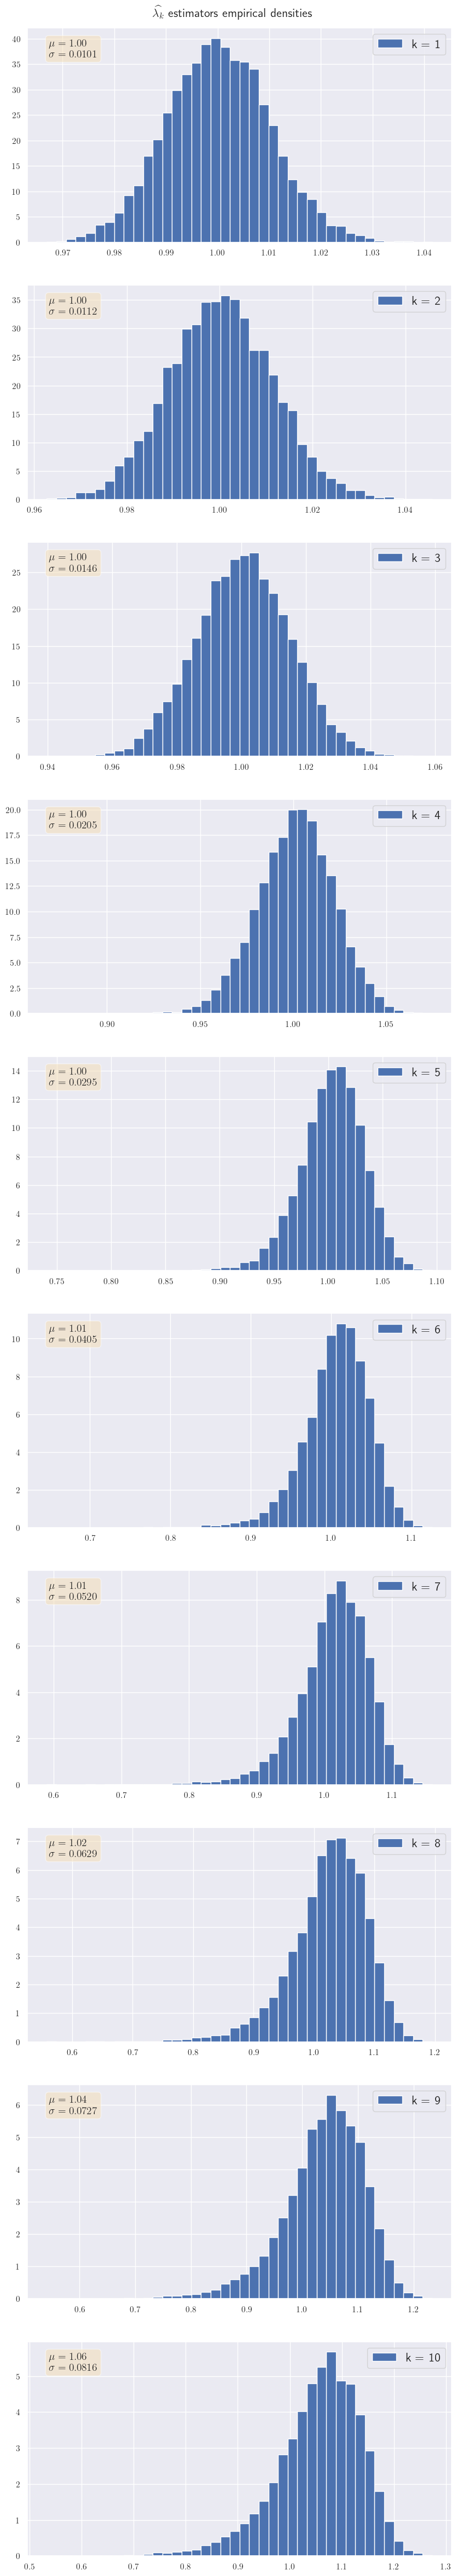

In [40]:
fig, axs = plt.subplots(k_arr.size, figsize=(10, 60))
fig.suptitle(r'$\widehat{\lambda_k}$ estimators empirical densities', y=0.887, fontsize=16)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for idx, ax in np.ndenumerate(axs):
    ax.hist(est[idx], density=True, bins=40, label=r'k = %.d' % (idx[0] + 1, ))
    ax.legend(fontsize=16)
    textstr = '\n'.join((
    r'$\mu=%.2f$' % (est[idx].mean(), ),
    r'$\sigma=%.4f$' % (est[idx].std(), )))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        horizontalalignment='left', verticalalignment='top', bbox=props)
plt.show()

Видим, что при увеличении $k$ оценка ведет себя всё хуже и хуже (в ассимптотическом подходе), так как увеличиваются дисперсии.

Являются ли данные оценки асимптотически нормальными? Проверьте это теоретически и моделированием -- постройте эмпирическую плотность распределения статистик $\sqrt{n}\left(\widehat\lambda_k - \lambda\right)$.

Из теоремы о наследовании асимптотической нормальности будет следовать, что данные оценки будут асимптотически нормально приближать исходный параметр $\lambda$. Причем асимптотическая дисперсия будет равна $$\sigma_k = \frac{\lambda^2}{k^2}\left(\frac{2k!}{(k!)^2}-1\right).$$ Функция выше - строго монотонна по $k$, т. е. дисперсия увеличивается при увеличении $k$, т. е. чем больше $k$ тем больше разброс оценки, тем менее эта оценка точна.

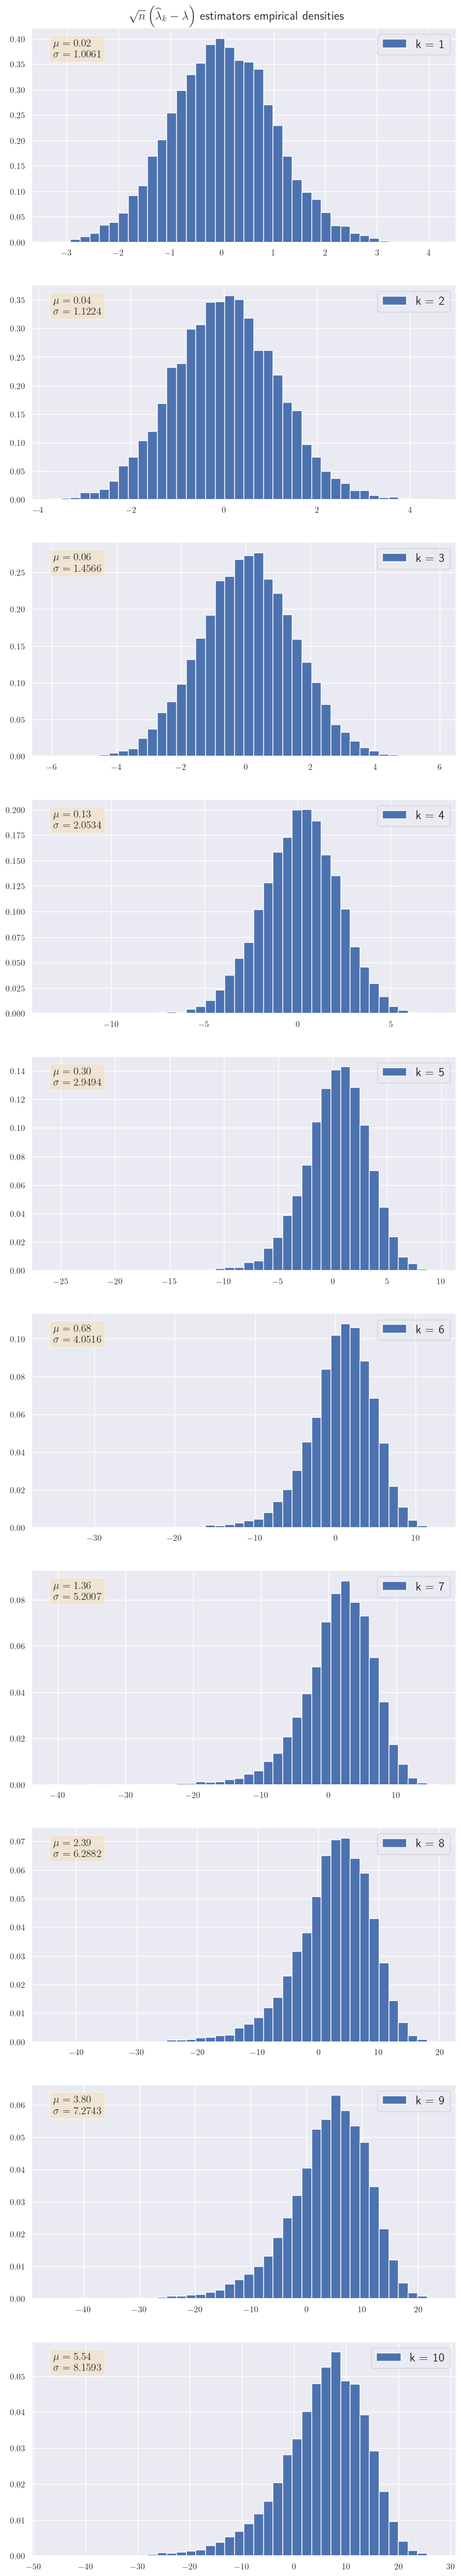

In [44]:
fig, axs = plt.subplots(k_arr.size, figsize=(10, 60))
fig.suptitle(r'$\sqrt{n}\left(\widehat\lambda_k - \lambda\right)$ estimators empirical densities', y=0.887, fontsize=16)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for idx, ax in np.ndenumerate(axs):
    P = np.sqrt(N)*(est[idx]-lamb)
    ax.hist(P, density=True, bins=40, label=r'k = %.d' % (idx[0] + 1, ))
    ax.legend(fontsize=16)
    textstr = '\n'.join((
    r'$\mu=%.2f$' % (P.mean(), ),
    r'$\sigma=%.4f$' % (P.std(), )))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        horizontalalignment='left', verticalalignment='top', bbox=props)
plt.show()

Видим, что оценки действительно ведут себя асимптотически нормально.

Посчитайте дисперсию оценок для разных $k$ и разных размеров выборки. Сходится ли она к теоретической? Что Вы можете сказать о скорости сходимости?

In [157]:
k_arr = np.arange(1, 11)
est = np.zeros((k_arr.size, N, N))
for k in k_arr:
    P = np.cumsum(X**k, axis=1)[:, ]/np.arange(1, N + 1)
    est[k - 1] = (((pow((factorial(k))/P, 1/k)) - lamb)[:, ]*np.sqrt(np.arange(1, N + 1))).T

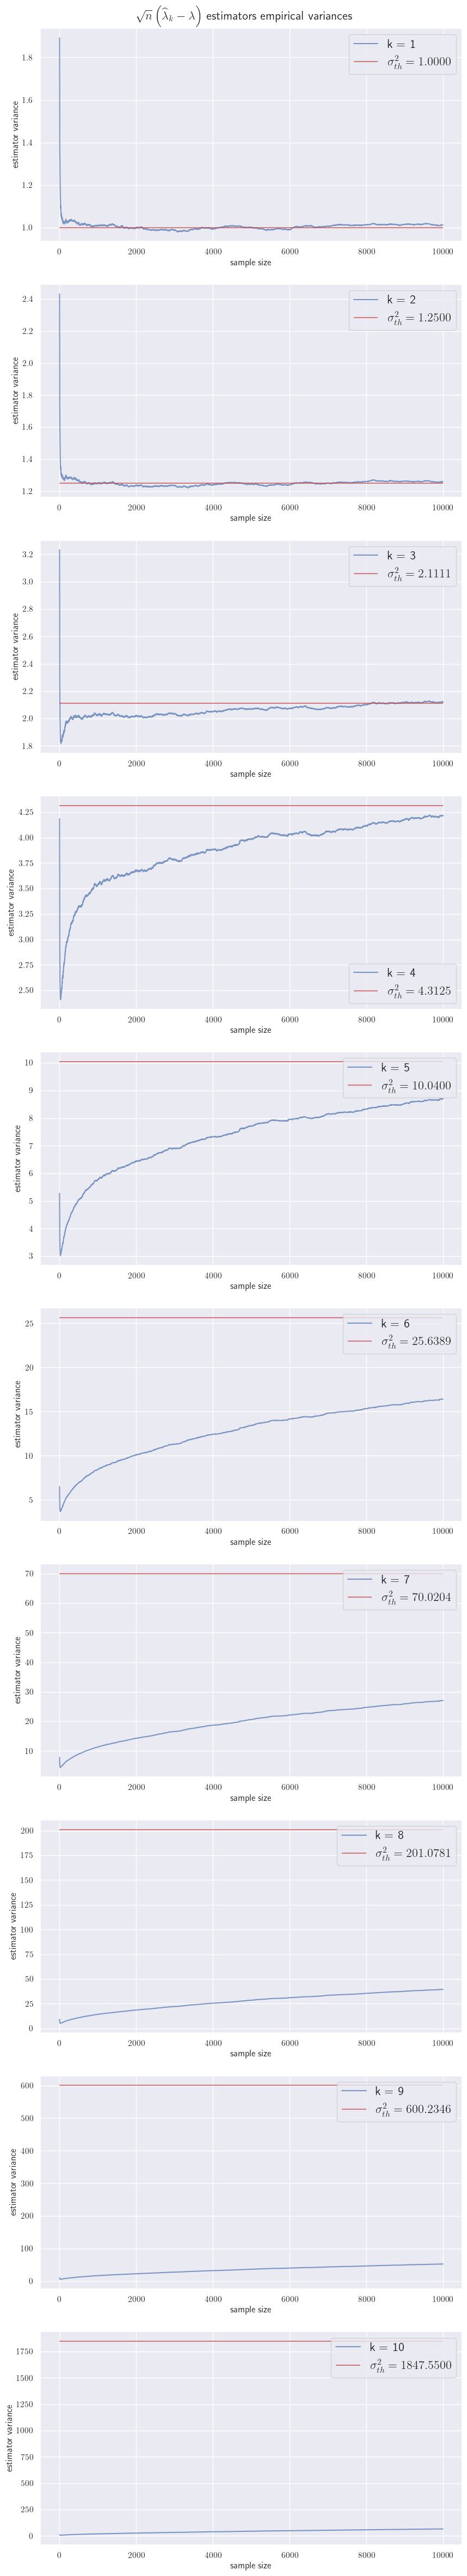

In [114]:
fig, axs = plt.subplots(k_arr.size, figsize=(10, 60))
fig.suptitle(r'$\sqrt{n}\left(\widehat\lambda_k - \lambda\right)$ estimators empirical variances', y=0.887, fontsize=16)
sigma_th = [((factorial(2*k))/(factorial(k)**2) - 1)/(k**2) for k in k_arr]

for k in k_arr:
    P = est[k - 1][6:N - 1, :].var(axis=1)
    axs[k - 1].plot(np.arange(7, N), P, label=r'k = %.d' % (k, ), alpha=0.7)
    axs[k - 1].hlines(sigma_th[k - 1], 3, N - 1, 
                      label=r'$\sigma^2_{th} = %.4f$' % (sigma_th[k - 1]), color='r', alpha = 0.7)
    axs[k - 1].set_xlabel('sample size')
    axs[k - 1].set_ylabel('estimator variance')
    axs[k - 1].legend(fontsize=16)
plt.show()

Видим, что сходимость к теоретическмоу значению дисперсии есть при $k \in [1, 6]$, причём с ростом $k$ она становится всё медленнее и медленнее. Про остальные же $k$ сделать какие-либо выводы не представляется возможным ввиду недостаточного для этих оценок размера выборки.

На одном графике изобразите плотности распределений оценок для разных $k$ и на основе графика сделайте выбор параметра. Обоснуйте его.

In [158]:
k_arr = np.arange(1, 11)
est_new = np.zeros((k_arr.size, N))
for idx, k in np.ndenumerate(k_arr):
    est_new[idx] = pow((factorial(k))/(sps.moment(X, order=k, center=0., axis=1)), 1/k)

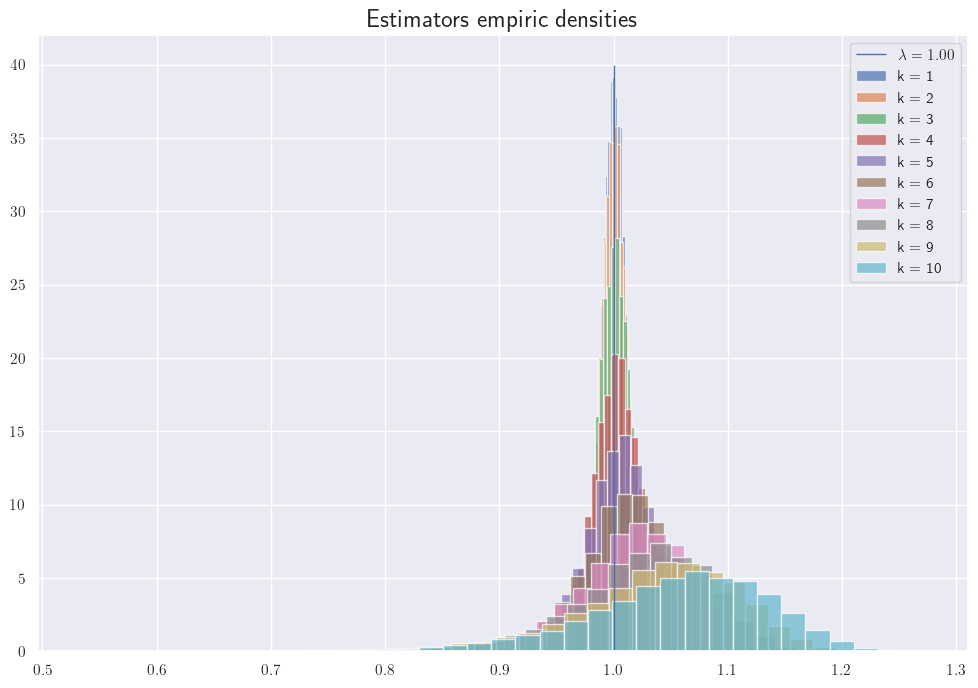

In [161]:
plt.figure(figsize=(12, 8))
plt.title('Estimators empiric densities', fontsize=18)
plt.vlines(lamb, 0.0, 40, lw=1.0, label=r'$\lambda = %.2f$' % (lamb, ))

for k in k_arr:
    plt.hist(est_new[k - 1], density=True, bins=35, alpha=0.7, label=r'k = %.d' % (k, ))

plt.legend()
plt.show()

Видим, что наилучшая (в среднеквадратичном подходе) оценка (наименьшая дисперсия) достигается при $k = 1$.

Для одной выборки постройте графики $\left|\hat{\lambda}_k - \lambda\right|$ и сравните скорости сходимости к нулю при увеличении размера выборки.

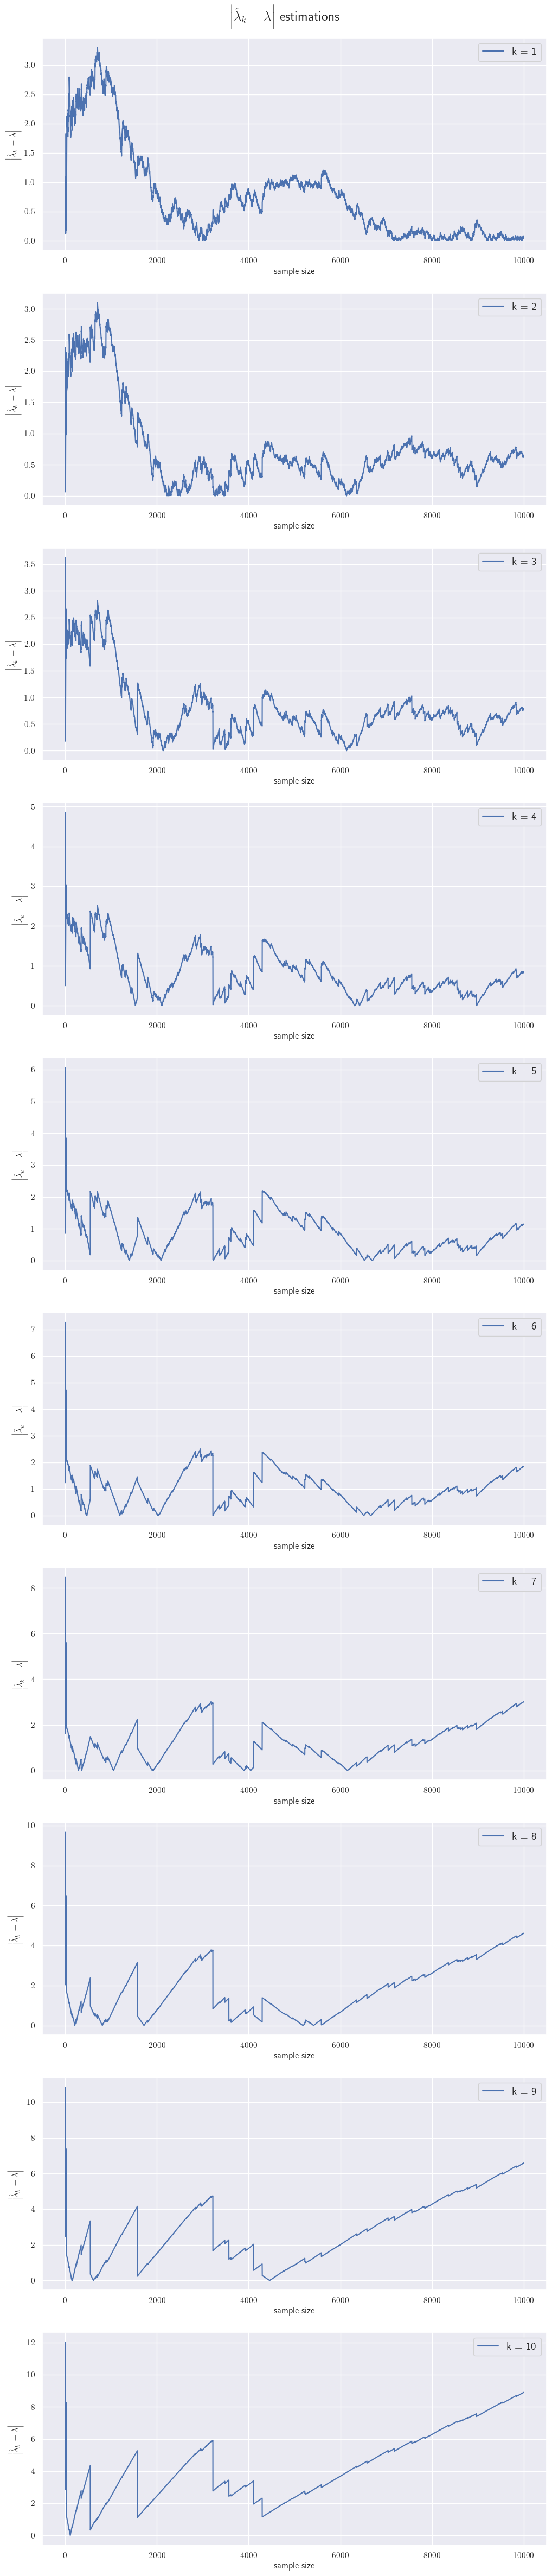

In [178]:
fig, axs = plt.subplots(k_arr.size, figsize=(12, 60))
fig.suptitle(r'$\left|\hat{\lambda}_k - \lambda\right|$ estimations', y=0.89, fontsize=18)

for k in k_arr:
    axs[k - 1].plot(np.arange(1, N + 1), abs(est[k - 1, :, 0] - lamb), label='k = %.d' % (k, ))
    axs[k - 1].set_ylabel(r'$\left|\hat{\lambda}_k - \lambda\right|$')
    axs[k - 1].set_xlabel('sample size')
    axs[k - 1].legend(fontsize=14)

plt.show()

Сделайте вывод.


__Вывод:__ при $k = 1$ видна какая-никакая сходимость к нулю при увеличении размера выборки. При $k \in [2, 5]$ поведение графика похоже на слабые флуктуации относительно нулевого значения, поэтому **возможно** с увеличением размера выборки они тоже будут стремиться к нулю. При остальных же $k$ очень мало что понятно про их ассимптотическое поведение, поскольку имеющейся выборки недостаточно ни для проверки сходимости эмпирической дисперсии к теоретическому значению, ни для проверки сходимости значения самой оценки к исходному параметру. Таким образом, суммируя всё выше сказанное, заключаем, что лучшая оценка - это $\hat{\lambda_1}$.

### Задача 3

Кианские провинции до сих пор надеются отделиться от Новой Империи, и поэтому планируют саботировать Ордалию. К их счастью, число урожая в пустынных землях на юге подчиняется распределению Коши, которое отличается существенно от двух распределений из задач 1 и 2. Чем отличается? Как это повлияет на оценивание его параметра сдвига?

В этой задаче Вам нужно показать на примере, как построение интуитивно понятной оценки без теоретического обоснования может дать неадекватный результат.

Ниже напишите, какое поведение Вы ожидаете от оценки среднего и медианы. Обоснуйте ожидания, ссылаясь на теоремы и задачи из курса теории вероятностей:

**Ответ**: посколько у распределения Коши отсутствует математическое ожидание, сходиться оценке среднего попросту не к чему. Выборочная же медиана будет (по следствию из теоремы о выборочной квантиле) сходиться ассимптотически к теоретическому $1/2$-квантилю, который для распределения Коши равен параметру сдвига. Ассимптотическая сходимость будет происходить с дисперсией $$\sigma^2 = \pi^2/4.$$

Для распределения Коши моделированием изучите поведение оценки параметра сдвига при помощи среднего и медианы. У какой из этих оценок лучше асимптотические свойства?

In [188]:
N = 1e4  # use this
N = int(N)
mu = 2.0 # shift parameter

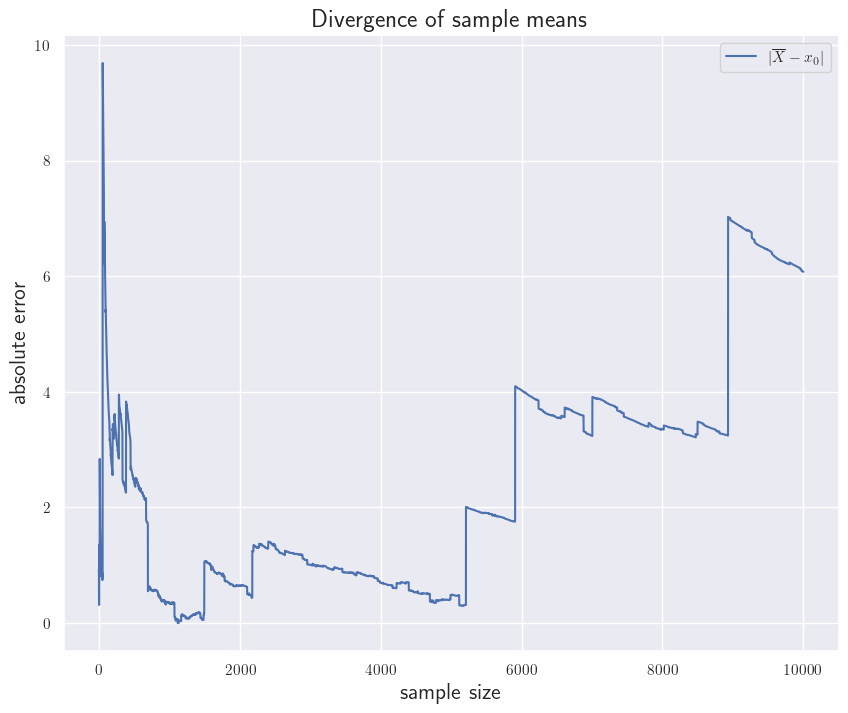

In [190]:
X = sps.cauchy.rvs(loc=mu, size=N)
err = abs((np.cumsum(X) / np.arange(1, N + 1)) - mu)

plt.figure(figsize=(10, 8))
plt.xlabel('sample size', fontsize=16)
plt.ylabel('absolute error', fontsize=16)
plt.title('Divergence of sample means', fontsize=18)
plt.plot(np.arange(1, N + 1), err, label=r'$|\overline{X} - x_0|$')
plt.legend()
plt.show()

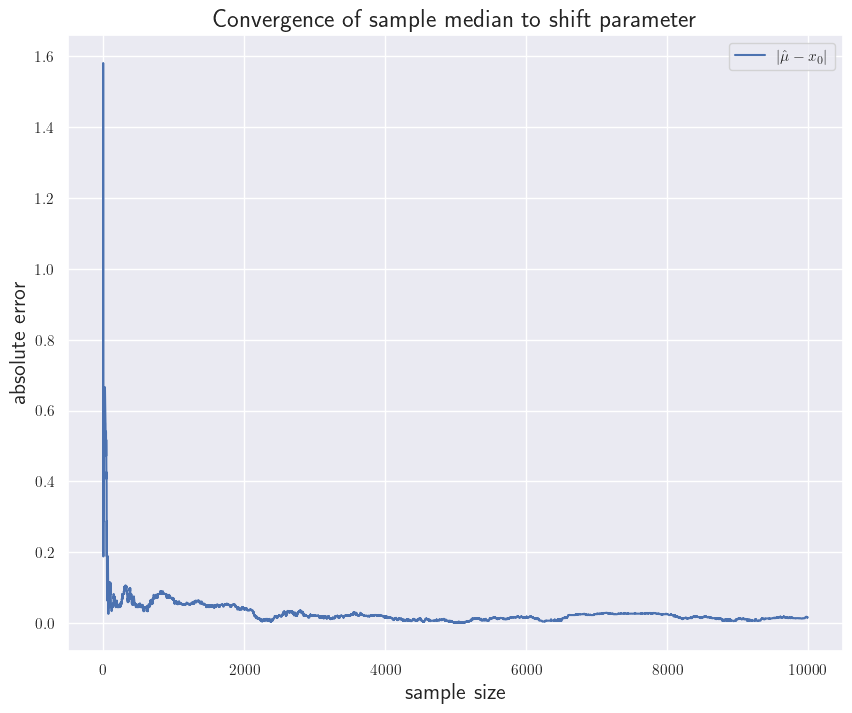

In [192]:
X = sps.cauchy.rvs(loc=mu, size=N)
cum_median = abs(np.array([np.median(X[:i + 1]) for i in range(N)]) - mu)

plt.figure(figsize=(10, 8))
plt.xlabel('sample size', fontsize=16)
plt.ylabel('absolute error', fontsize=16)
plt.title('Convergence of sample median to shift parameter', fontsize=18)
plt.plot(np.arange(1, N + 1), cum_median, label=r'$|\hat{\mu} - x_0|$')
plt.legend()
plt.show()

Проверьте свои теоретические ожидания, написанные в начале задачи. Моделированием проверьте, какие оценки состоятельны и асимптотически нормальны.

Проверим, сходятся ли оценки по вероятности, т.е. их состоятельность.

In [195]:
N = 2000
mu = 2.0

X = sps.cauchy.rvs(loc=mu, size=(N, N))
est_1 = np.cumsum(X, axis=1) / np.arange(1, N+1)
est_2 = np.zeros((N, N))
for i in range(N):
    est_2[i] = np.array([np.median(X[i, :j + 1]) for j in range(N)])

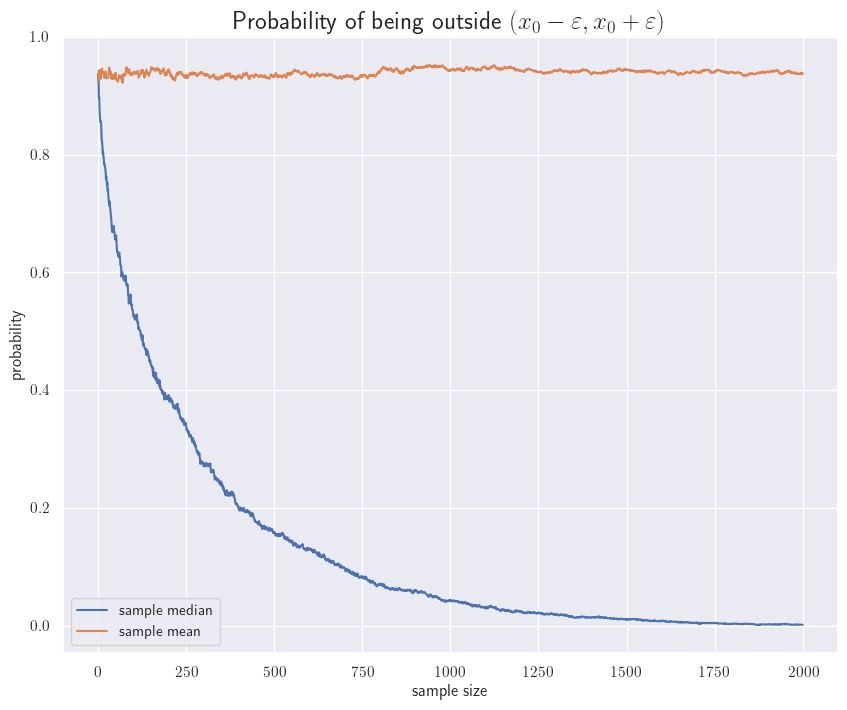

In [197]:
eps = 0.1

prob_mean = (abs(est_1 - mu) > eps).sum(axis=0)/N
prob_median = (abs(est_2 - mu) > eps).sum(axis=0)/N

plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, N + 1), prob_median, label='sample median')
plt.plot(np.arange(1, N + 1), prob_mean, label='sample mean')
plt.xlabel('sample size')
plt.ylabel('probability')
plt.title(r'Probability of being outside $(x_0-\varepsilon, x_0 + \varepsilon)$', fontsize=18)
plt.legend()
plt.show()

Как видим, оценка параметра сдвига через выборочную медиану является состоятельной, так как имеется сходимость по вероятности. Meanwhile для оценки через выборочное среднее сходимость отсутствует полностью, т.е. ассимптотической нормальности для этой оценки нет и подавно, так как состоятельность является её необходимым условием. Проверим ассимптотическую нормальность выборочной медианы.

In [502]:
N = 10000
N = int(N)

X = sps.cauchy.rvs(loc=mu, size=(N, N))
est = np.median(X, axis=1)

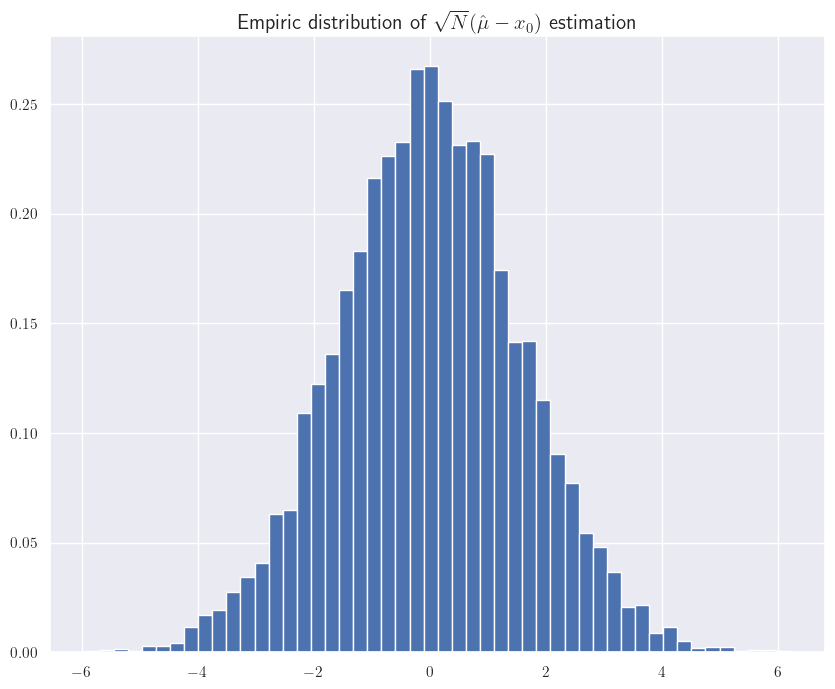

Variance equals:  2.5011485769630357


In [504]:
plt.figure(figsize=(10, 8))
plt.hist(np.sqrt(N)*(est - mu), density=True, bins=50)
plt.title(r'Empiric distribution of $\sqrt{N}(\hat{\mu} - x_0)$ estimation', fontsize=15)
plt.show()
print('Variance equals: ', np.var(np.sqrt(N)*(est - mu)))

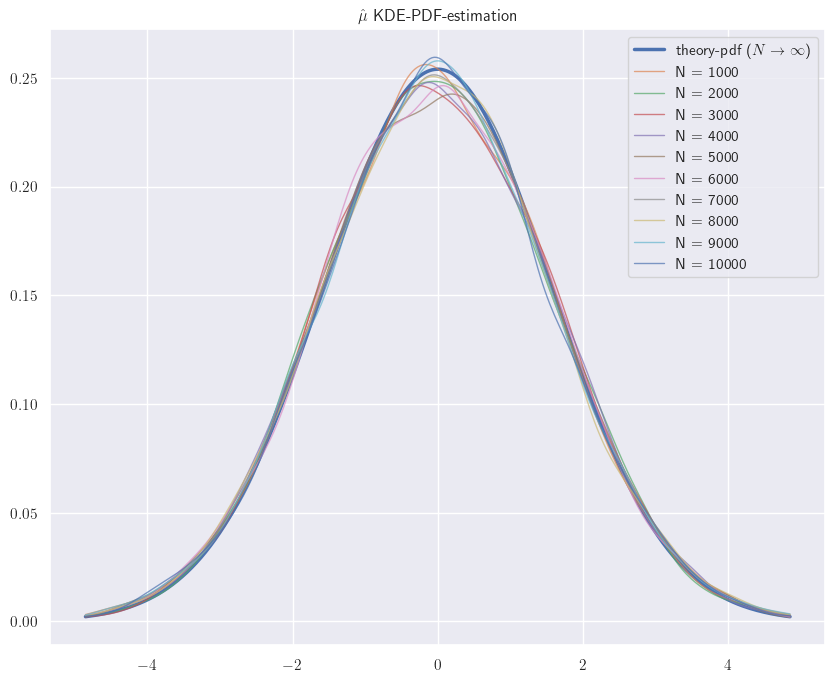

In [506]:
sigma_0 = np.pi/2.0
N_arr = np.arange(1000, 10001, 1000)
grid = np.linspace(sps.norm.ppf(0.001, scale=sigma_0), sps.norm.ppf(0.999, scale=sigma_0), 300)

plt.figure(figsize=(10,8))
plt.title(r'$\hat{\mu}$ KDE-PDF-estimation')
plt.plot(grid, sps.norm.pdf(grid, scale=sigma_0), lw=2.5, label=r'theory-pdf ($N \rightarrow \infty$)')
for n in N_arr:
    est = np.sqrt(n)*(np.median(X[:, :n], axis=1) - mu)
    kernel = sps.gaussian_kde(est)
    plt.plot(grid, kernel.pdf(grid), label='N = %5d' % (n), alpha=0.7, lw=1)
plt.legend()
plt.show()

Как видим, оценка медианы ассимпотически нормальна с теоретической медианой, совпадающей с параметром сдвига.

Изучите поведение эмпирической дисперсии оценок среднего и медианы. Какая из них сходится? С какой скоростью? Для проверки постройте график какой-то детерминированной функции с такой же скоростью сходимости.

In [219]:
N = 1000
mu = 2.0

X = sps.cauchy.rvs(loc=mu, size=(N, N))
est_1 = np.cumsum(X, axis=1) / np.arange(1, N+1)
est_2 = np.zeros((N, N))
for i in range(N):
    est_2[i] = np.array([np.median(X[i, :j + 1]) for j in range(N)])

var_1 = est_1.var(axis=0)
var_2 = est_2.var(axis=0)

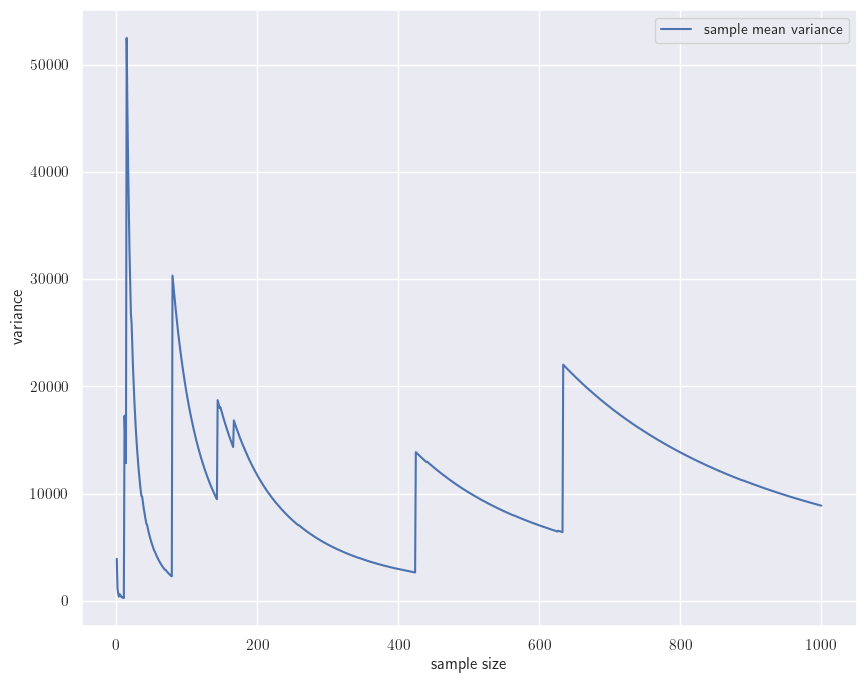

In [221]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, N + 1), var_1, label='sample mean variance')
plt.xlabel('sample size')
plt.ylabel('variance')
plt.legend()
plt.show()

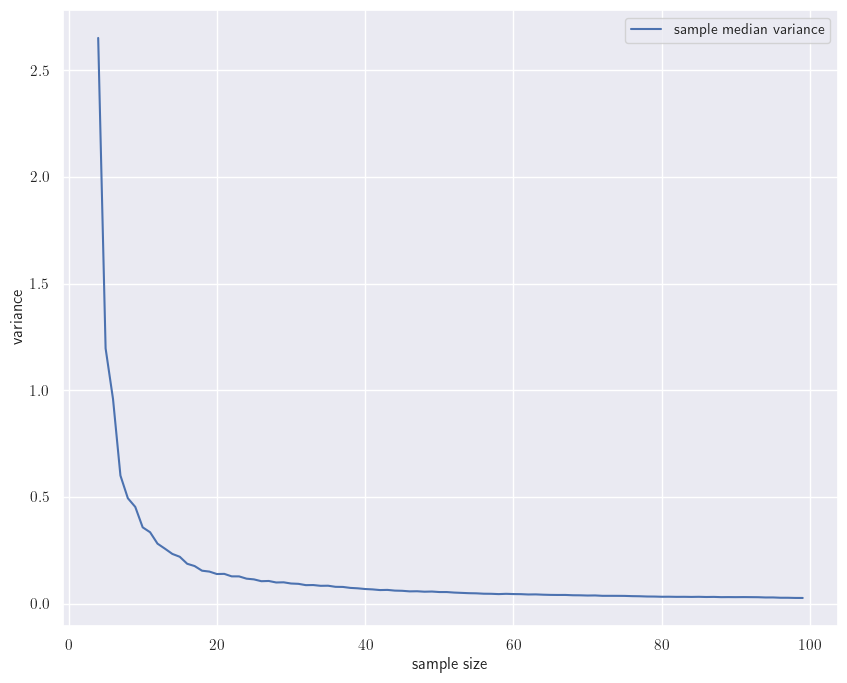

In [223]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(4, 100), var_2[3:99], label='sample median variance')
plt.xlabel('sample size')
plt.ylabel('variance')
plt.legend()
plt.show()

**Вывод:** смогли убедиться, что не всегда очевидные и интуитивно простые для нас оценки (выборочное среднее, к примеру) дают адекватную оценку ситуации. Поэтому никогда не бывает лишним предварительный теоретический анализ ситуации, а также рассмотрение других оценок того же самого параметра (выбочная медиана, например).

### Задача 4

Древние свитки из Сареотской библиотеки хранят знания двух древних волшебников севера --- Гливенко и Кантелли. Два мага-гностика придумали ультимативный способ оценивания распределений количества чего угодно. Их способом пользовались короли севера ещё две тысячи лет назад, во времена Первой Ордалии. Аспект-Император отдал приказ проверить, верны ли их выкладки до сих пор.

Эта задача посвящена проверке теоремы Гливенко-Кантелли, как основного теоретического результата курса. Условия посмотрите в методичке или сходите на лекцию старшего магистра колдовства и чародейства Савёлова М.П.

Сгенерируйте $N$ выборок $X_1,\dots, X_N$ размера $N$ из стандартного нормального распределения для $N = 10^4$.

In [572]:
N = 1e4
N = int(N)
np.random.seed(42)
X = sps.norm.rvs(size=(N, N))

Для всех $n \leqslant N$ первой выборки посчитайте эмпирическую функцию распределения.


In [558]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdfs: typing.List[ECDF] = [ECDF(X[:i, 0]) for i in range(1, N + 1)]

Для некоторых $n$ (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`) и сравните каждый из них с истинной функцией распределения (количество графиков равно количеству различных значений $n$).

Проверьте выполнение теоремы Гливенко-Кантелли.

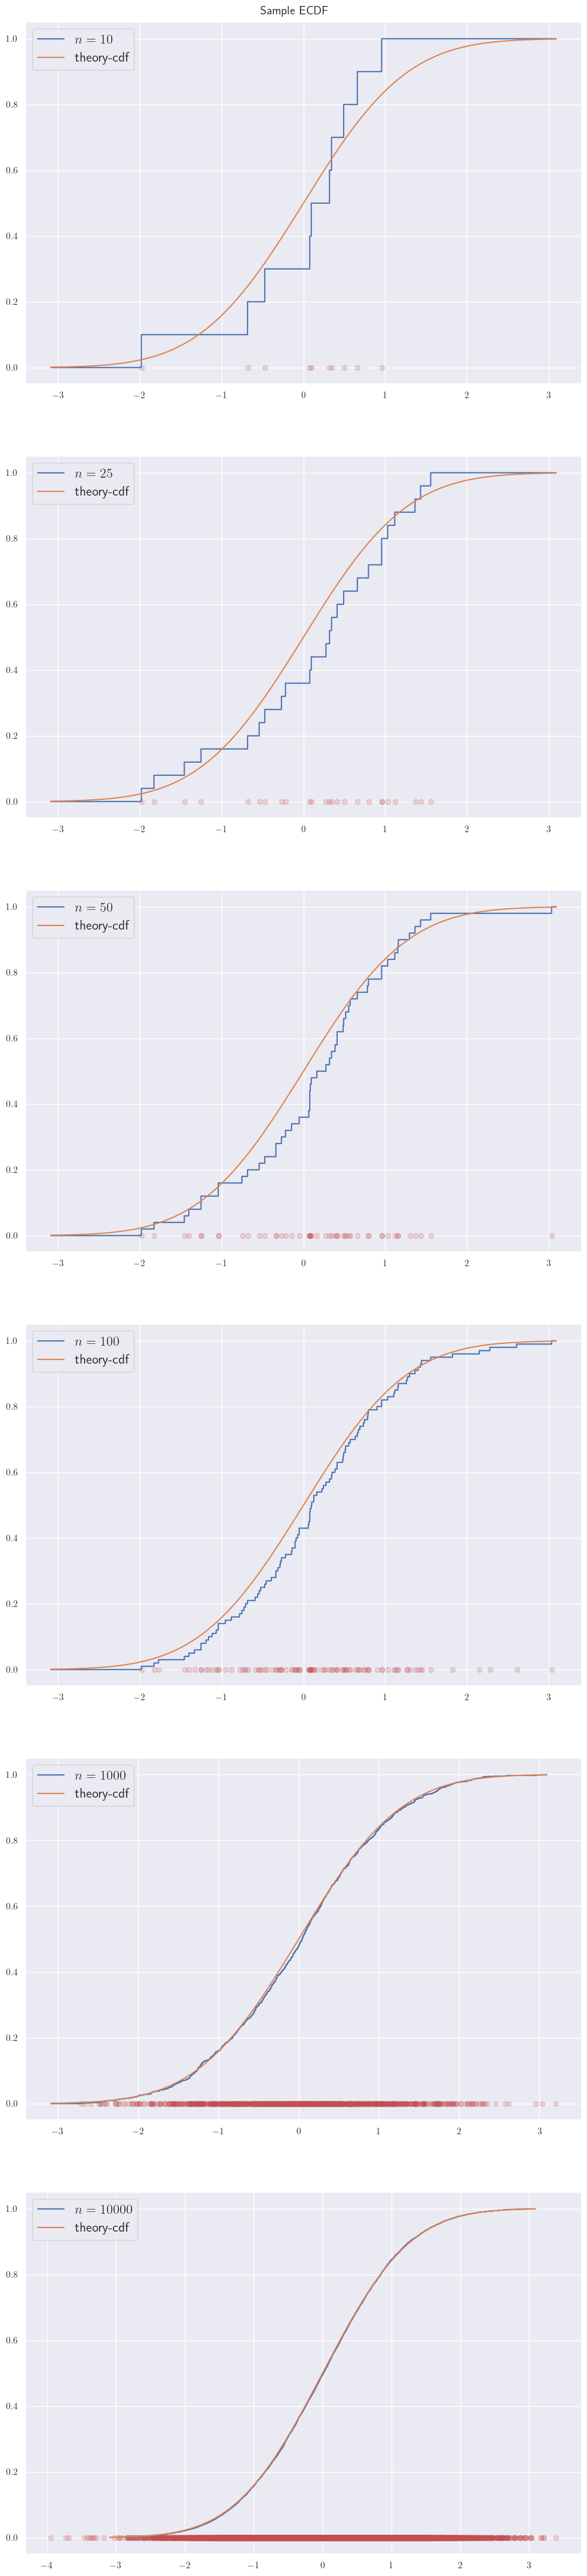

In [561]:
N_arr = np.array([10, 25, 50, 100, 1000, N])
grid = np.linspace(sps.norm.ppf(0.001), sps.norm.ppf(0.999), 1000)
fig, axs = plt.subplots(N_arr.size, figsize=(12, 55))
plt.suptitle('Sample ECDF', y=0.885)

for idx, n in np.ndenumerate(N_arr):
    x = X[:n, 0]
    y = np.zeros_like(x)
    axs[idx].step(grid, ecdfs[n - 1](grid), label=r'$n = %.d$' % (n, ))
    axs[idx].plot(grid, sps.norm.cdf(grid), label='theory-cdf')
    axs[idx].scatter(x, y, c='r', alpha=0.2)
    axs[idx].legend(fontsize=16)

plt.show()

Видно, что с увеличением размера выборки, эмпирическая функция распределения всё больше и больше похожа на теоретическую CDF.

Для всех $n ≤ N$ посчитайте значение $D_n = \displaystyle{\sup_{x \in \mathbb R}} | \hat{F}_n(x) - F(x)|$ для первой выборки. Промоделируйте поведение статистики $\sqrt{n}D_n$. Наблюдается ли сходимость их распределений на графиках?


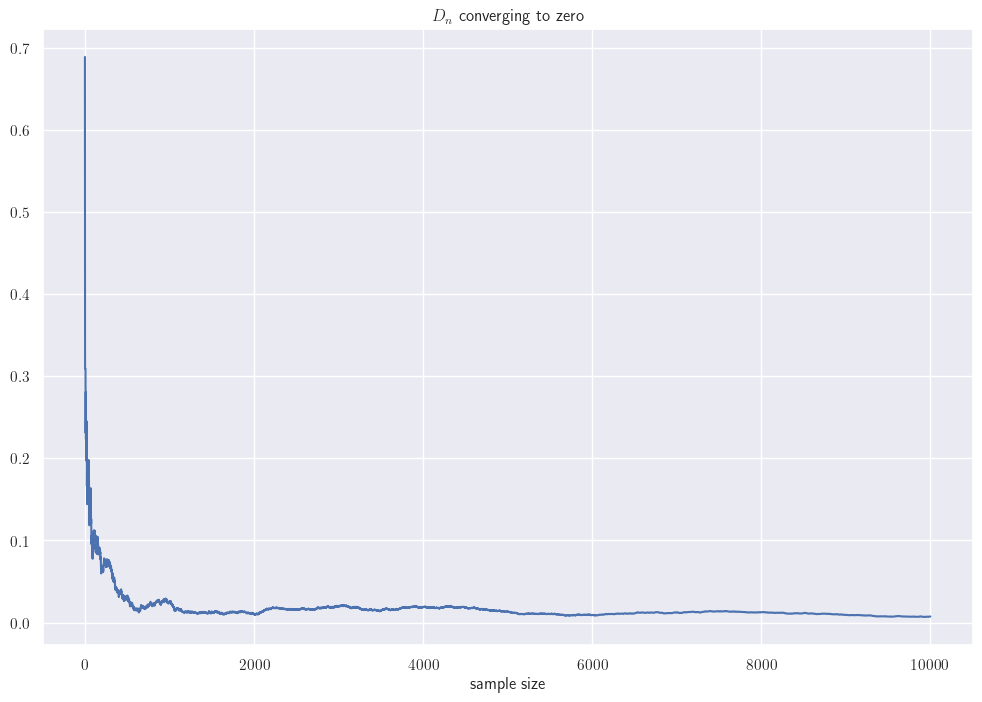

In [576]:
N_arr = np.arange(1, N + 1)
grid = np.linspace(sps.norm.ppf(0.001), sps.norm.ppf(0.999), 1000)
D = np.array([abs(ecdfs[n - 1](grid) - sps.norm.cdf(grid)).max() for n in N_arr])
plt.figure(figsize=(12, 8))

plt.plot(N_arr, D)
plt.title(r'$D_n$ converging to zero')
plt.xlabel('sample size')

plt.show()

In [590]:
N_arr = np.arange(1000, 10001, 1000)
grid = np.linspace(sps.norm.ppf(0.001), sps.norm.ppf(0.999), 1000)
D = np.zeros((N_arr.size, N))
for idx, n in np.ndenumerate(N_arr):
    D[idx] = np.array([(abs(ECDF(X[:n, j])(grid) - sps.norm.cdf(grid))).max() for j in range(N)])

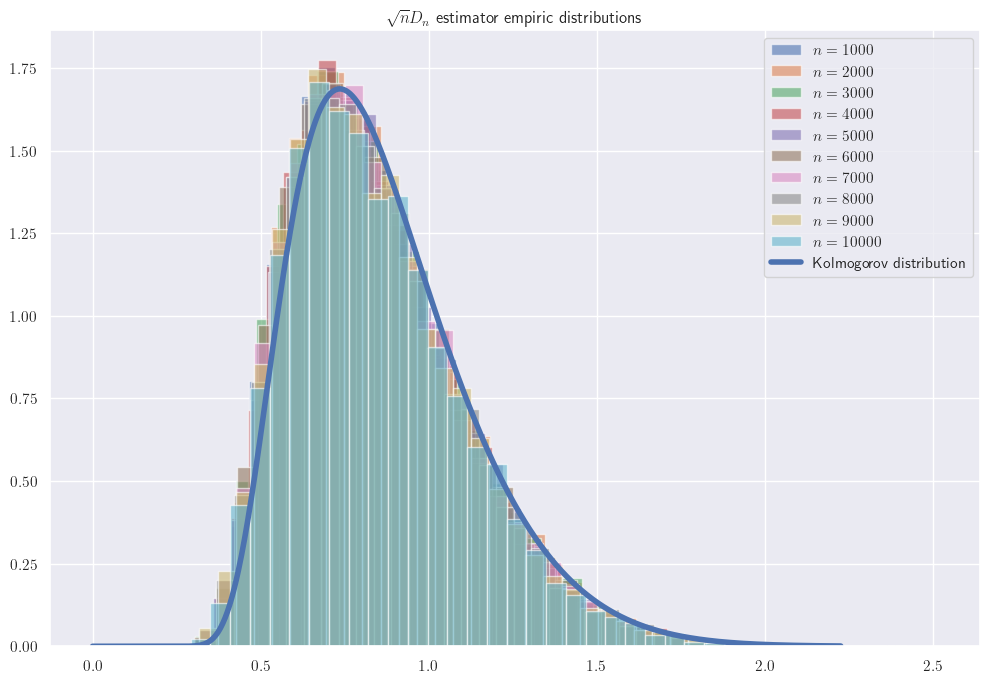

In [592]:
plt.figure(figsize=(12, 8))
plt.title(r'$\sqrt{n}D_n$ estimator empiric distributions')
grid_new = np.linspace(0, sps.kstwobign.ppf(0.9999), 1000)

for idx, n in np.ndenumerate(N_arr):
    plt.hist(np.sqrt(n)*D[idx], density=True, bins=35, label=r'$n = %.d$' % (n, ), alpha=0.6)

plt.plot(grid_new, sps.kstwobign.pdf(grid_new), lw=4.0, label='Kolmogorov distribution')

plt.legend()
plt.show()

Пища для ума: если Ваша эмпирическая плотность сходится к чему-то, то это не просто так! Поищите на просторах интернета, учебников и бесед с умными людьми, куда должна сходиться статистика $\sqrt{n}D_n$. Подумайте, для чего может быть полезен этот теоретический результат.

Ответ: статистика $\sqrt{n}D_n$ сходится по распределению к случайной величине $K = \sup_{t\in[0, 1]}|B(t)|$, где $B(t)$ - броуновский мост, $K$ - так называемое Колмогоровское распределение. Данный результат верен не только для функций нормального распределения, но и для любых других распределений, что является основой **тестирования Колмогорова-Смирнова**, которое позволяет проверять принадлежность выборки тому или ному распределению.

Сделайте вывод о важности теоремы Гливенко-Кантелли в численном анализе. Какие методы, применяемые Вами в других задачах неявно основываются на этой теореме?

**Вывод:** благодаря теореме Гливенко-Кантелли у нас есть возможность тестировать гипотезы о принадлежности выборки тому или иному вероятностному распределению, плюс благодаря теореме основная задача мат. статистики как таковая вообще обоснована: распределение вероятности случайной величины можно восстановить по выборочному распределению.

### Задача 5

Оказывается, нельзя оценивать распределения оценок на глаз простым всматриванием в графики! Поэтому гностики из крепости Нрон изобрели новое заклинание -- QQ-plot. В этой задаче Вам предстоит научиться проверять распределения на принадлежность семействам при помощи этого инструмента.

В этой задаче Вам предлагается изучить инструмент QQ-plot и сделать на его основе выводы о равенстве распределений.

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $\mathrm U{[0, \theta]}$ для $\theta=1$ размера $n=40$. Моделированием статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ изучите их распределение. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

Указание: можно взять код и результаты из задачи 1. Просто скопируйте их сюда.

In [712]:
N_samples = 400
n = 40
theta = 1.0
X = sps.uniform.rvs(scale=theta, size=(N_samples, n))

est_1 = 2*X.mean(axis=1)
est_2 = (n + 1)*X.max(axis=1)/(n)

bins = [i / 40 + 0.8 for i in range(18)]

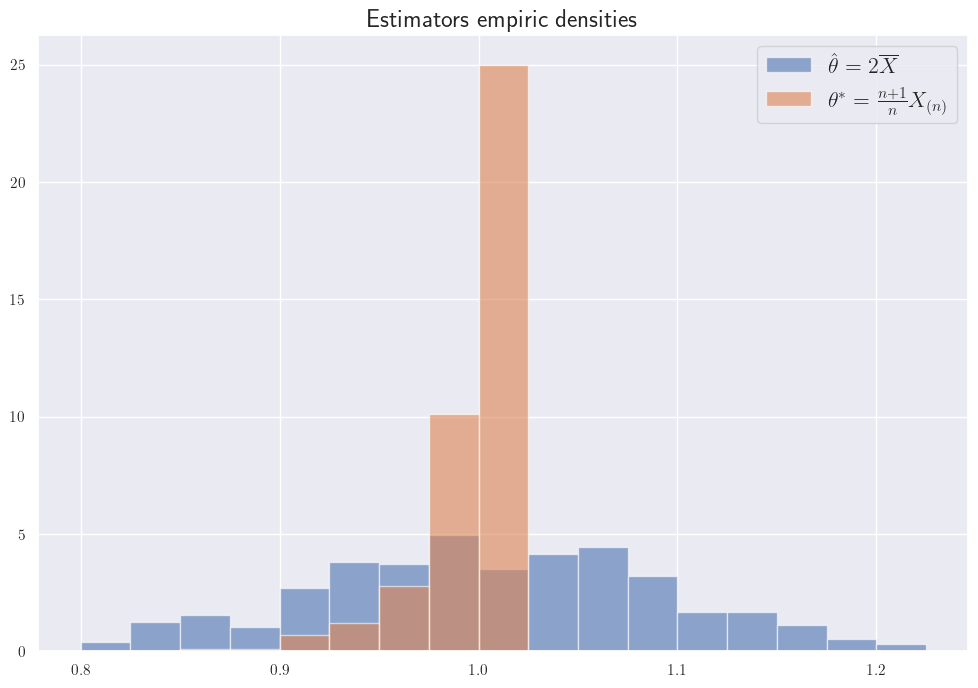

In [714]:
plt.figure(figsize=(12, 8))
plt.title('Estimators empiric densities', fontsize=18)
plt.hist(est_1, bins, density=True, alpha=0.6, label=r'$\hat{\theta} = 2\overline{X}$')
plt.hist(est_2, bins, density=True, alpha=0.6, label=r'$\theta^* = \frac{n + 1}{n}X_{(n)}$')
plt.legend(fontsize=16)
plt.show()

Промоделируйте статистики $\sqrt{n} (\hat\theta - \theta)$ и $\theta - n  (\theta^* - \theta)$. К чему сходятся их распределения с ростом $n$?

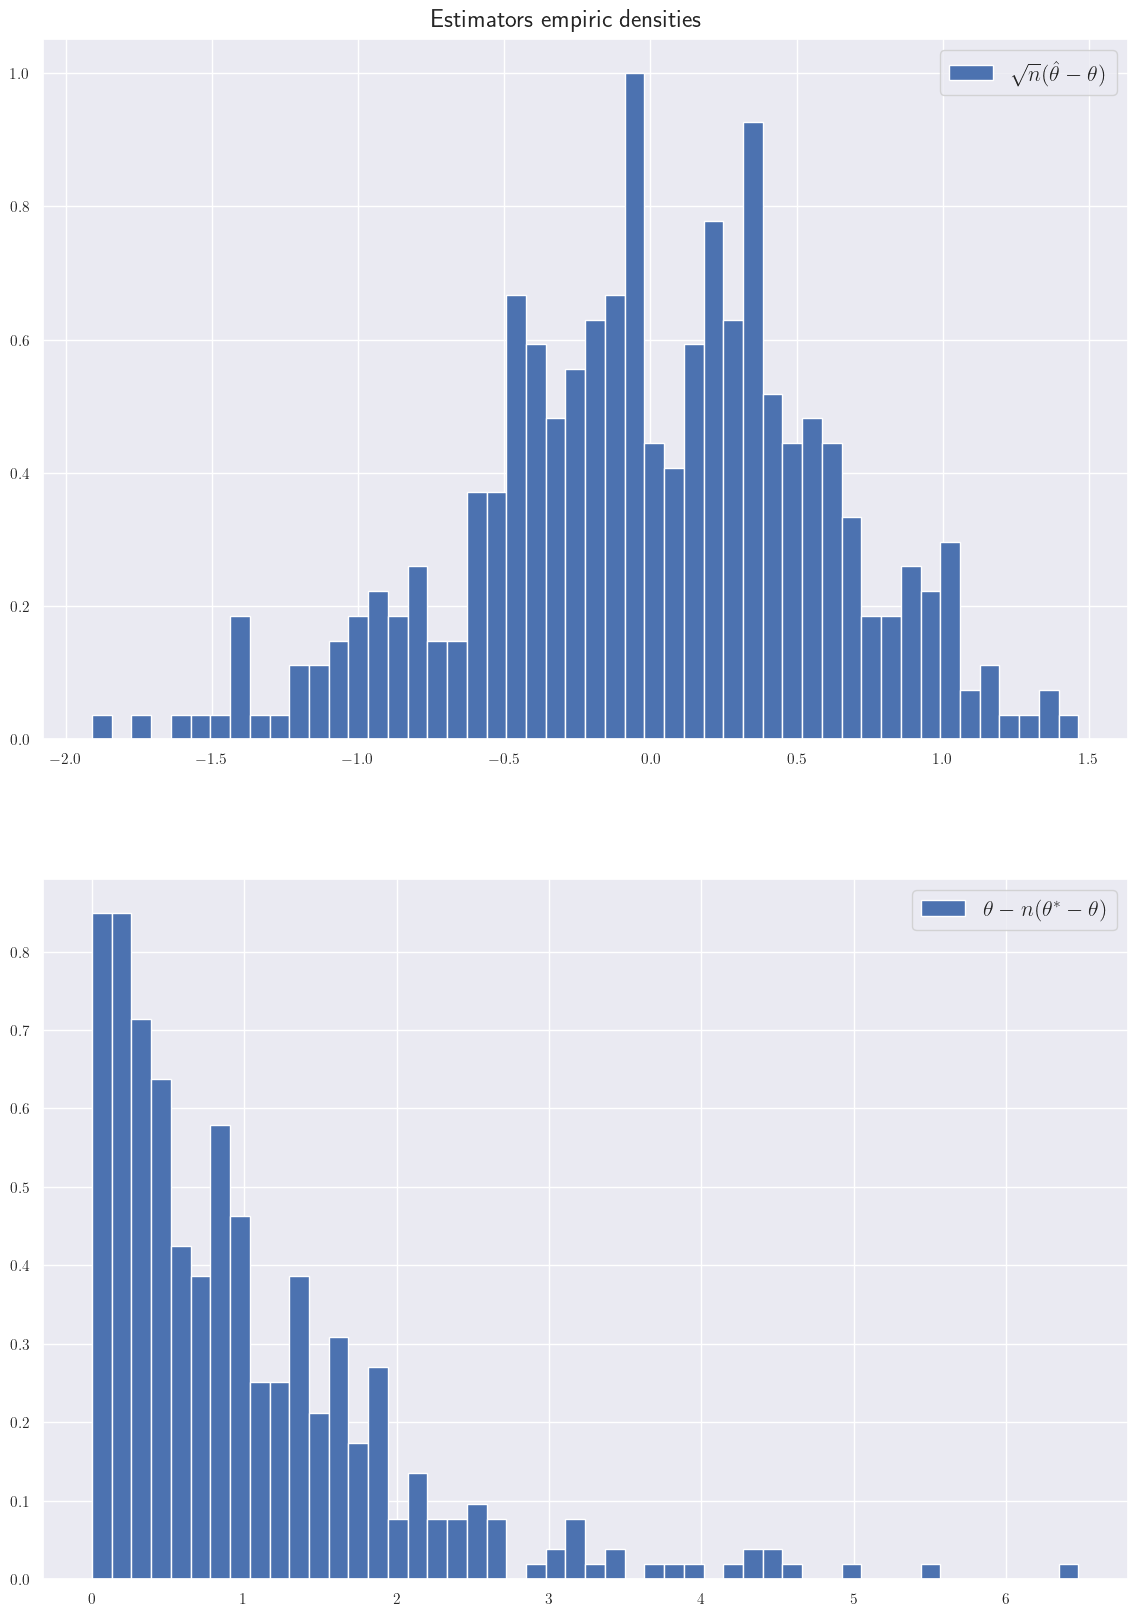

In [799]:
fig, axs = plt.subplots(2, figsize=(14, 20))
plt.suptitle('Estimators empiric densities', y=0.895, fontsize=18)
axs[0].hist(np.sqrt(n)*(est_1 - theta), 50, density=True, label=r'$\sqrt{n} (\hat\theta - \theta)$')
axs[1].hist(theta - n*(est_2 - theta), 50, density=True, label=r'$\theta - n  (\theta^* - \theta)$')
axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:** первая похожа на нормальное распределение, второе - на показательное.

Вспомните, чему равен коэффициент $\sigma^2(\theta)$ для асимптотически нормальной оценки $\hat\theta = 2\overline{X}$ параметра $\theta$ равномерного распределения в формуле
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}} \xrightarrow{d} \mathcal N(0, 1).
$$

**Ответ**: $\sigma^2(\theta) = \theta^2/3$

Посчитайте статистику
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma^2(\theta)}}$$ для каждой выборки. Постройте её плотность теоретически и при помощи KDE.

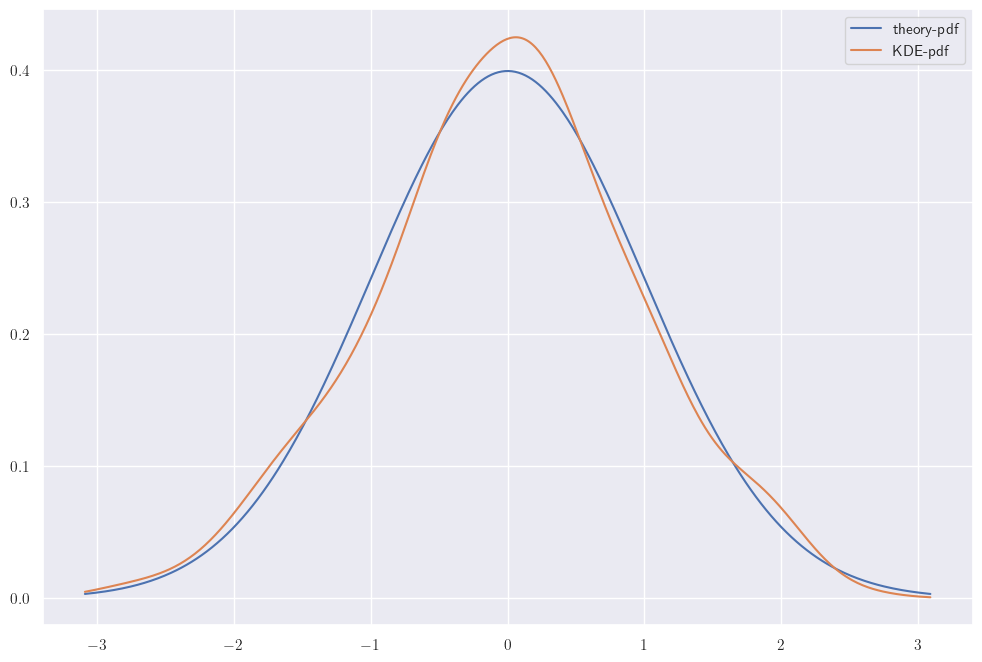

In [678]:
sigma_1 = np.sqrt(theta**2/3)
st_1 = np.sqrt(n)*(est_1 - theta)/sigma_1
grid = np.linspace(sps.norm.ppf(0.001), sps.norm.ppf(0.999), 500)
plt.figure(figsize=(12, 8))
kernel = sps.gaussian_kde(st_1)

plt.plot(grid, sps.norm.pdf(grid), label='theory-pdf')
plt.plot(grid, kernel.pdf(grid), label='KDE-pdf')
plt.legend()
plt.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению, часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Изучите семинарский ноутбук ноль и постройте QQ-plot предложенной статистики и нормального распределения.

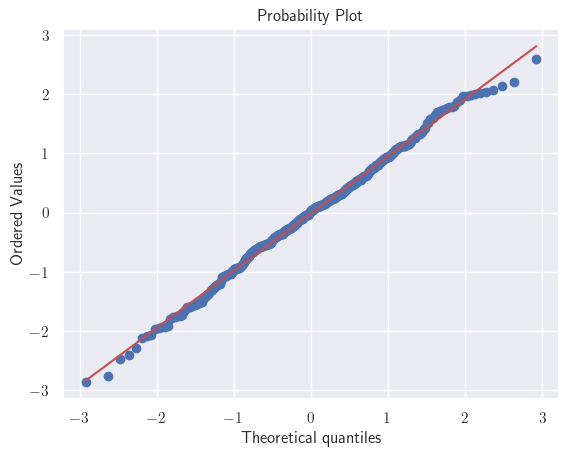

In [682]:
_ = sps.probplot(st_1, dist=sps.norm(), plot=plt)
plt.show()

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** да.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

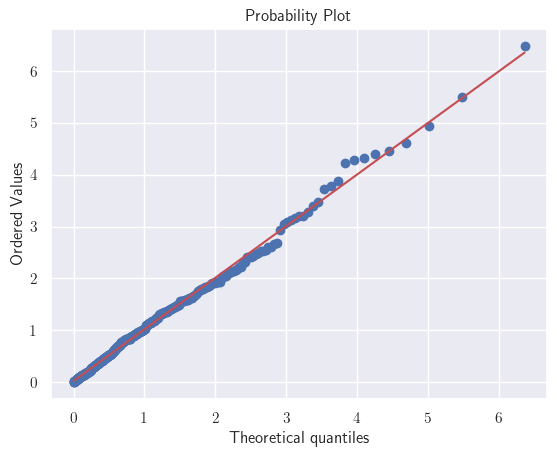

In [743]:
st_2 = theta - n*(est_2 - theta)
sps.probplot(st_2, dist=sps.expon(), plot=plt)
plt.show()

**Ответ:** показательное с параметром $1$.

Бонусная часть (+5 баллов): Если Вы нашли семейство распределений, которое по QQ-plot соответствует выборке, то докажите строго, что $n(\theta^* - \theta)$ сходится к нему. Заметьте, что это утверждение от асимптотической нормальности отличается только заменой $\sqrt{n}$ на $n$. Такие оценки называются **сверхнормальными**. В конце доказательства поясните:

- как множитель, зависящий от $n$, связан с скоростью сходимости оценки на практике?
- лучше ли сверхномальная оценка, чем нормальная оценка?

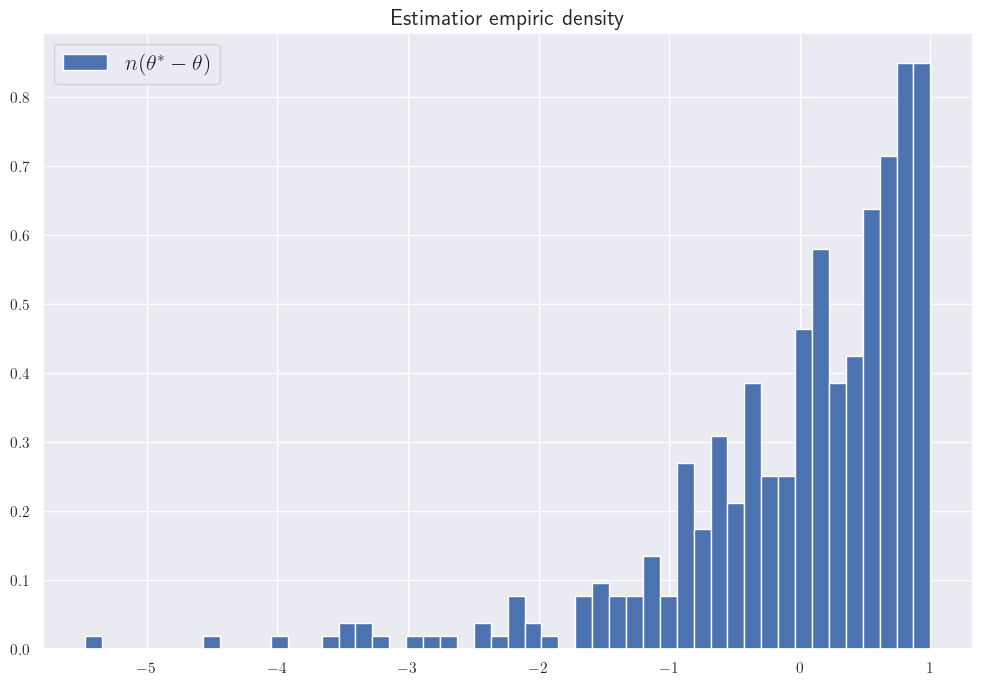

In [805]:
st_3 = n*(est_2 - theta)
plt.figure(figsize=(12, 8))
plt.title('Estimatior empiric density', fontsize=16)
plt.hist(st_3, density=True, bins=50, label=r'$n(\theta^* - \theta)$')
plt.legend(fontsize=16)
plt.show()

In [813]:
print('(Theory)Normal estimator variance = (theta**2)/3 = ', theta**2/3)
print('(Experiment)Normal estimator variance = ', (np.sqrt(n)*(est_1 - theta)).var())
print('(Theory)Subnormal estimator variance = (theta**2) = ', theta**2)
print('(Experiment)Subnormal estimator variance = ', st_3.var())

(Theory)Normal estimator variance = (theta**2)/3 =  0.3333333333333333
(Experiment)Normal estimator variance =  0.35561958194723176
(Theory)Subnormal estimator variance = (theta**2) =  1.0
(Experiment)Subnormal estimator variance =  0.9615358463552071


**Решение:** оценка $n(\theta^* - \theta)$ будет сходиться по распределению к экспоненциальному распределению, смещенному на $-\theta$ и отраженному относительно оси $OY$ (видно из гистограммы выше). Теоретически данное утверждение очевидно проверить (оставляется проверяющему в качестве упражнения), если доказать предварительно то, что оценка $\hat{\mu} = \theta - n  (\theta^* - \theta)$ сходится по распределению к $Exp(\theta)$ (что экспериментально было доказано через QQ-plot в предыдущем пункте). Т.е. осталось доказать, что $$ \theta - n  (\theta^* - \theta) \xrightarrow{d_\theta} Exp(\theta).$$ **Доказательство:** $$\hat{\mu} = (n + 1)(\theta - X_{(n)})\;,\; p_{X_{(n)}}(t) = \frac{nt^{n-1}}{\theta^n} \Rightarrow p_{\hat{\mu}}(t) = \frac{n}{\theta (n + 1)}\cdot\left(1 - \frac{t}{\theta (n + 1)} \right)^{n - 1}\cdot I_{[0, \theta(n + 1)]}(t) \xrightarrow[\mathbb{R_{\ge0}}]{} \frac{1}{\theta}\cdot\exp(-\frac{t}{\theta}) \Rightarrow \hat{\mu} \sim Exp(\theta) \;\;\; \square.$$ Члены с $n$ гарантируют высокую скорость равномерной сходимости плотности распределения, причем при увеличении $n$ будет так же повышаться порядок аппроксимации, что даёт невероятно высокую скорость равномерной сходимость плотности распределения (и как следствие функции распределения). В конце концов в асимптотическом подходе (сравнивая дисперсии асимптотически эквивалентных распределений) получаем, что нормальная оценка лучше, посколько её дисперсия в 3 раза меньше дисперсии сверхнормальной.

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** ничего плохого в отсутствии асимптотической нормальности нет, сверхнормальность - просто лишь другой взгляд на одну и ту же задачу, который так же позволяет получать хорошие результаты. Причем как было показано в предыдущем пункие и в 1-й задаче, в случае сверхнормальной оценки сходимость происходит гораздо быстрее: как сходимость функций распределения, так и сходимость по вероятности. Поэтому, суммируя всё выше сказанное получаем, что сверхнормальная оценка выгоднее нормальной. Отличающиеся асимптотические дисперсии не так важны, посколюку они в конце концов одного порядка.

Не забудьте перезапустить с нуля весь ноутбук перед отправкой! Удачи.